## Import Libraries

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

## Load the dataset

In [101]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')

## Initial Exploration
### Shape and Structure

In [102]:
print(data.shape)
data.head()

(140700, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [103]:
data.drop(columns=['id', 'Name'], inplace=True)

### Data Types

In [104]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

### Data Types Conversion

In [105]:
data['Depression'] = data['Depression'].astype('category')

## Univariate Analysis

### Age

#### Check missing values

In [106]:
check_missing_values(data, 'Age')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [107]:
data['Age'].describe()

count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

#### Visualization

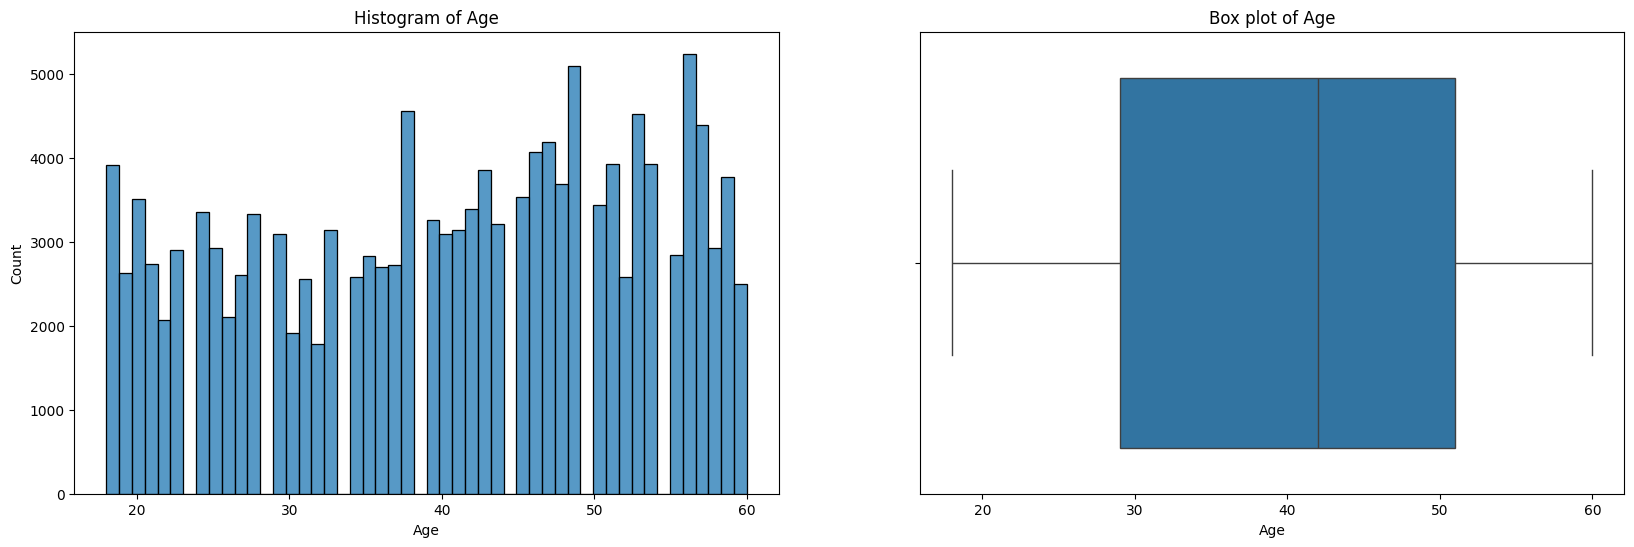

In [108]:
plot_numerical(data, 'Age')

#### Insights
- The dataset represents a balanced age range, from younger adults (18 years) to older adults (60 years)
- The uniform histogram suggests that no particular age group dominates, though middle-aged individuals are slightly more represented

#### CGPA

#### Check missing values

In [109]:
check_missing_values(data, 'CGPA')

Missing values count: 112802
Missing values percentage: 80.17%


#### Descriptive Statistics

In [110]:
data['CGPA'].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

#### Visualizations

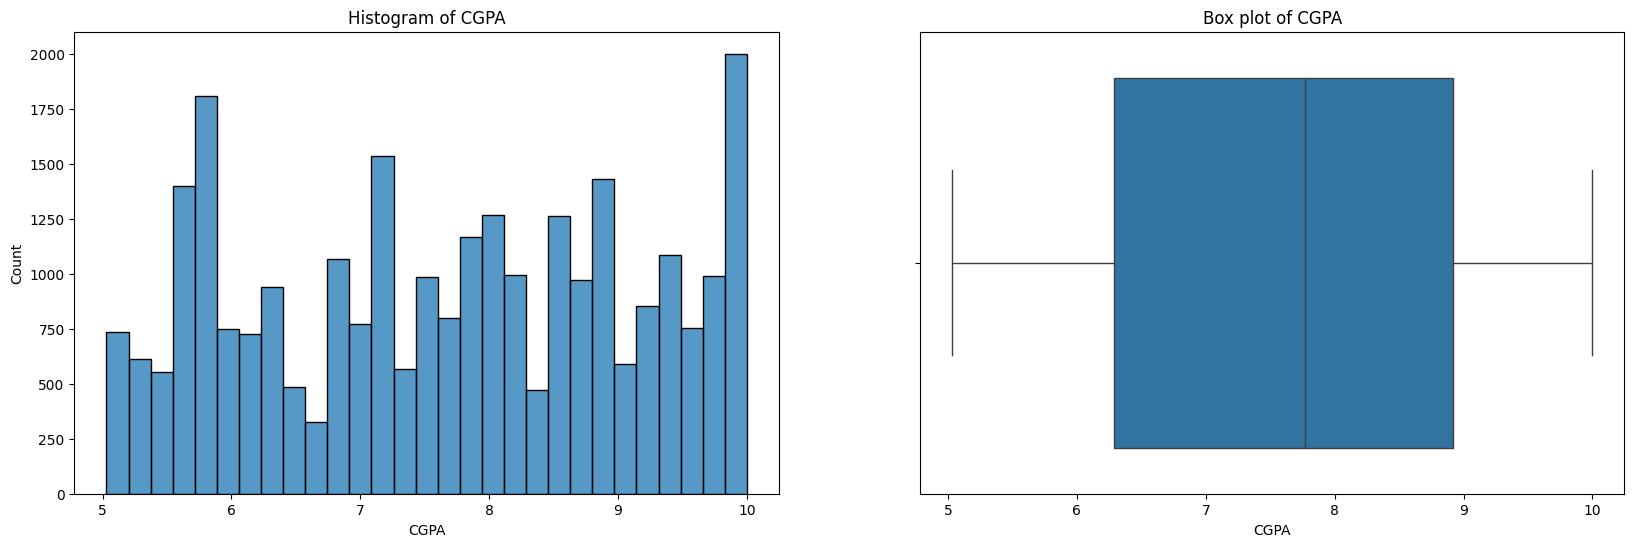

In [111]:
plot_numerical(data, 'CGPA')

**Insights:**
- The high percentage of missing values (80%) is due to the dataset composition, as most of the individuals are working professionals who likely do not have CGPA data
- For the 20% of students, the CGPA distribution indicates strong academic performance, with most students achieving CGPAs in the range of 7–9
- The right-skewed distribution suggests that a significant portion of students perform exceptionally well (CGPA > 8), while only a few fall at the lower end of the scale (CGPA < 6)

### Academic Pressure

#### Check missing values

In [112]:
check_missing_values(data, 'Academic Pressure')

Missing values count: 112803
Missing values percentage: 80.17%


#### Descriptive Statistics

In [115]:
data['Academic Pressure'].describe()

count     27897.0
unique        5.0
top           3.0
freq       7463.0
Name: Academic Pressure, dtype: float64

#### Visualizations

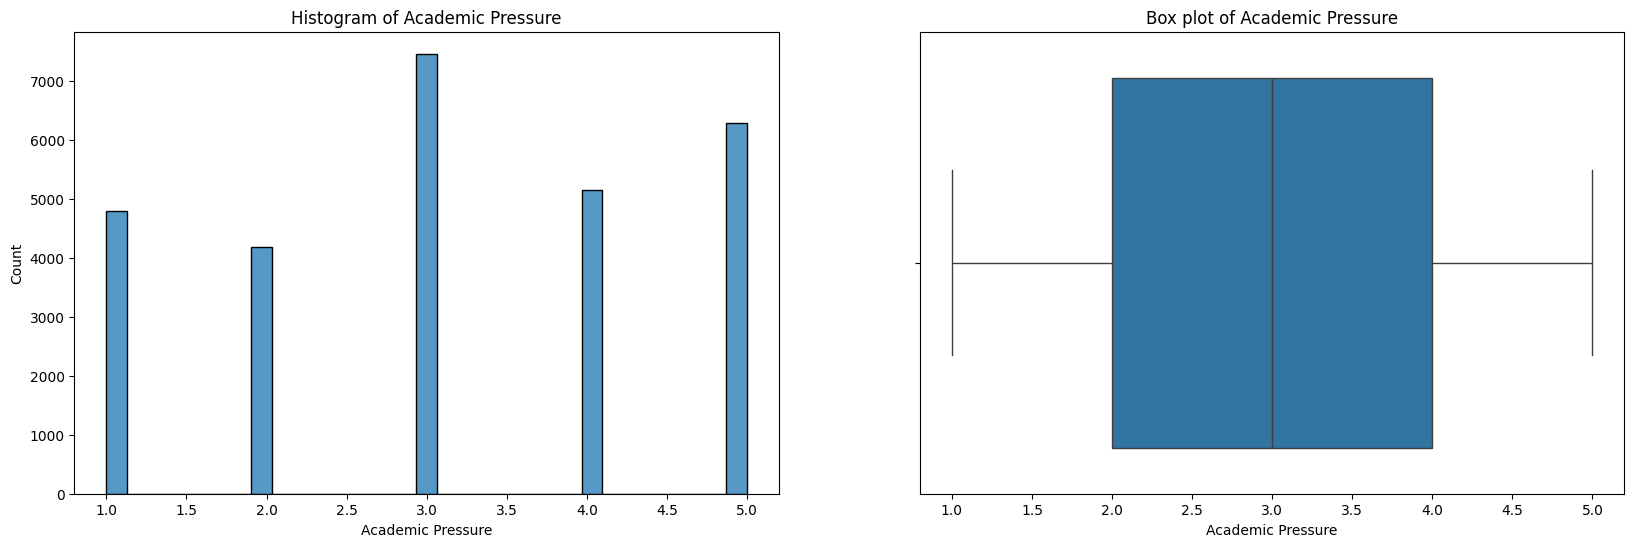

In [116]:
plot_numerical(data, 'Academic Pressure')

**Insights:**
- The missing values are expected and align with the working professionals not being part of the academic system
- The average academic pressure (3.14) indicates that most students report moderate levels of academic pressure
- A group perceives low pressure, possibly due to good academic preparedness or coping mechanisms
- A significant group reports high pressure, which may be linked to heavy workloads, external stressors, or personal struggles

### Work Pressure

#### Check missing values

In [16]:
check_missing_values(data, 'Work Pressure')

Missing values count: 27918
Missing values percentage: 19.84%


#### Descriptive Statistics

In [17]:
data['Work Pressure'].describe()

count    112782.000000
mean          2.998998
std           1.405771
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work Pressure, dtype: float64

#### Visualizations

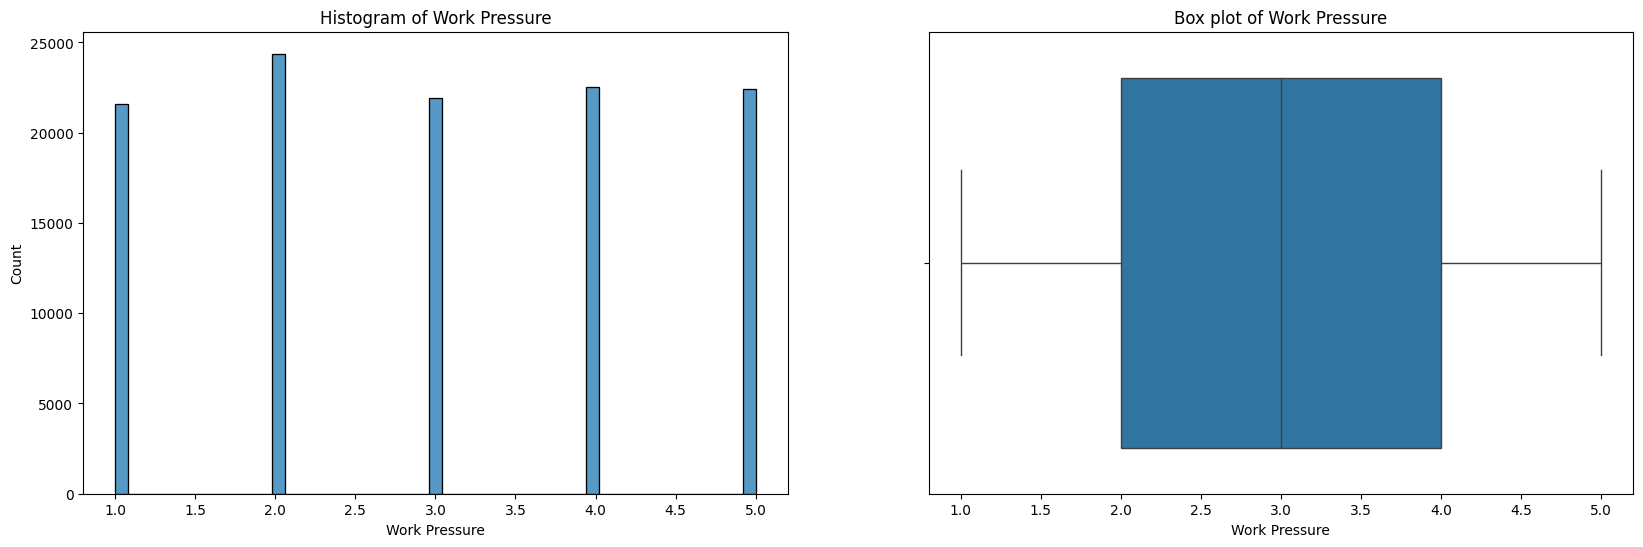

In [18]:
plot_numerical(data, 'Work Pressure')

#### Insights:
- The missing values correspond to the student population, as they do not experience work pressure
- The average work pressure is moderate (2.99) with no extreme concentrations, but a uniform distribution suggests that work pressure affects individuals differently, possibly depending on their roles, industries, or workloads
- Factors influencing high work pressure (e.g., job satisfaction, mental health, or work-life balance)

### Study Satisfaction

#### Check missing values

In [19]:
check_missing_values(data, 'Study Satisfaction')

Missing values count: 112803
Missing values percentage: 80.17%


#### Descriptive Statistics

In [20]:
data['Study Satisfaction'].describe()

count    27897.000000
mean         2.944940
std          1.360197
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64

#### Visualizations

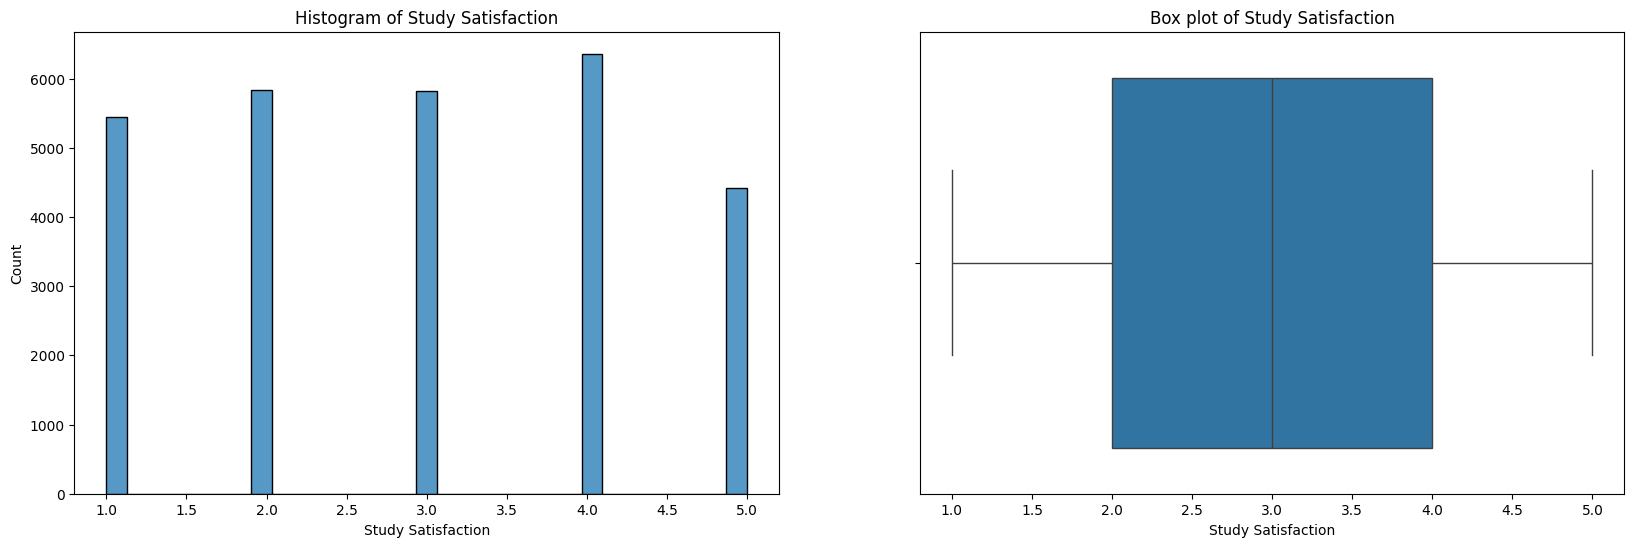

In [21]:
plot_numerical(data, 'Study Satisfaction')

#### Insights:
- The missing values are expected and align with the working professionals not being part of the student group
- The average study satisfaction is moderate (2.94), with no extreme clustering around any particular value. This suggests that students have a balanced mix of positive and negative experiences regarding their studies
- Possible external factors, such as academic pressure, CGPA, or institutional support, influencing satisfaction.

### Job Satisfaction

#### Check missing values

In [22]:
check_missing_values(data, 'Job Satisfaction')

Missing values count: 27910
Missing values percentage: 19.84%


#### Descriptive Statistics

In [23]:
data['Job Satisfaction'].describe()

count    112790.000000
mean          2.974404
std           1.416078
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

#### Visualizations

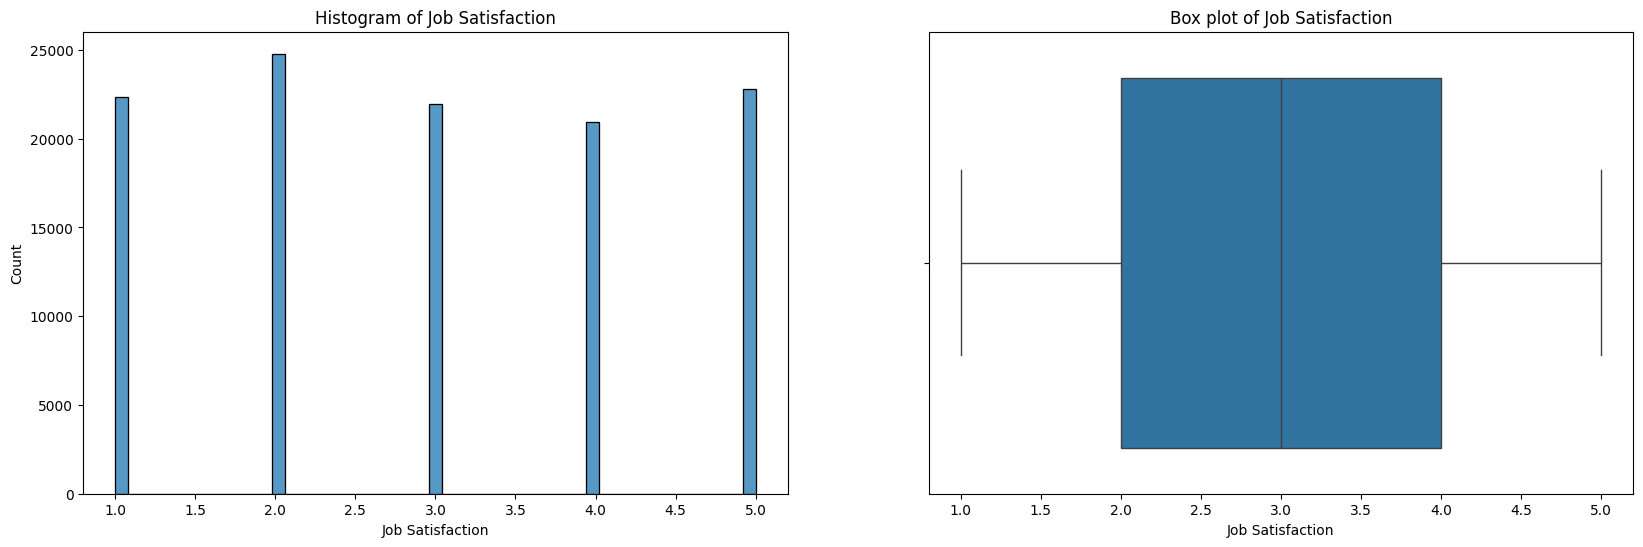

In [24]:
plot_numerical(data, 'Job Satisfaction')

#### Insights:
- The missing values align with the student population, as they are not included in job satisfaction reporting
- The average job satisfaction (2.97) indicates a generally moderate level, with equal representation across satisfaction levels suggesting diverse experiences in the workplace
- The uniform distribution may indicate that job satisfaction is influenced by a range of external factors, such as: Work pressure, job role, or work-life balance as well as demographics such as age, gender, or years of experience

### Work/Study Hours

#### Check missing values

In [25]:
check_missing_values(data, 'Work/Study Hours')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [26]:
data['Work/Study Hours'].describe()

count    140700.000000
mean          6.252679
std           3.853615
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Work/Study Hours, dtype: float64

#### Visualizations

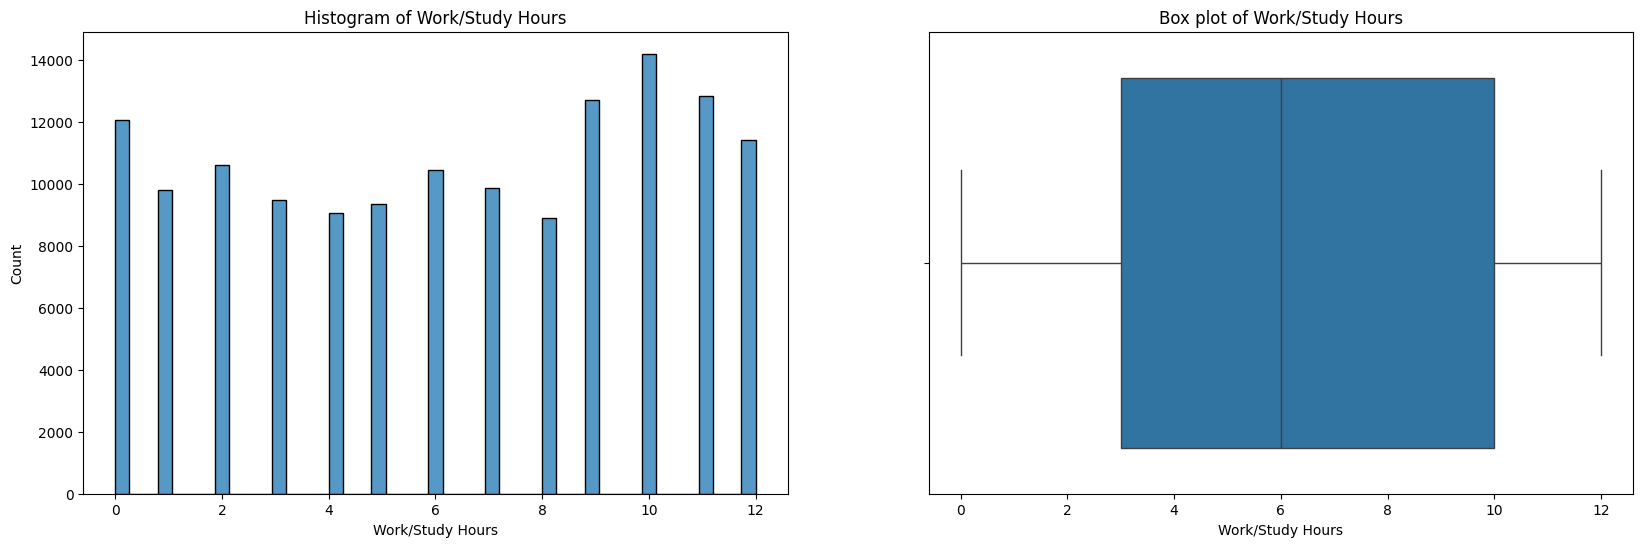

In [27]:
plot_numerical(data, 'Work/Study Hours')

#### Insights:
- The range of hours (0–12) and high standard deviation indicate significant differences in daily commitments across the dataset. Some individuals spend little to no time, while others engage for very long hours
- The mean and median values (~6 hours/day) suggest that, on average, individuals dedicate a reasonable amount of time to work or study
- The uniform histogram indicates diversity in engagement patterns, likely reflecting differences between working professionals and students
#### Possible Interpretation:
- Students might be more concentrated around high study hours (e.g., 8–10), while professionals may have a broader distribution based on job flexibility
- Low hours (0–3) might correspond to unemployed individuals or students on academic breaks

### Financial Stress

#### Check missing values

In [28]:
check_missing_values(data, 'Financial Stress')

Missing values count: 4
Missing values percentage: 0.0%


#### Descriptive Statistics

In [29]:
data['Financial Stress'].describe()

count    140696.000000
mean          2.988983
std           1.413633
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Financial Stress, dtype: float64

#### Visualizations

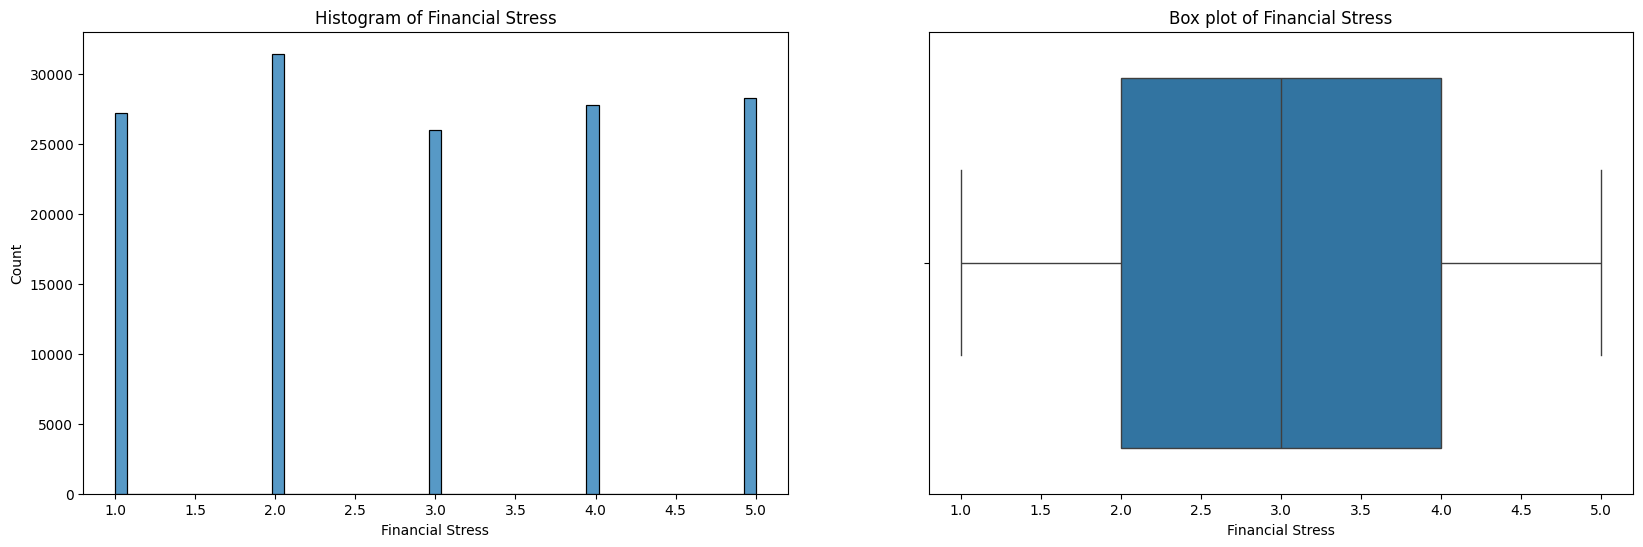

In [30]:
plot_numerical(data, 'Financial Stress')

#### Insights:
- The mean (2.99) and median (3.0) suggest that financial stress is neither predominantly low nor high but falls in the middle for most individuals
- The uniform distribution indicates significant variability, likely due to differences in income, expenses, and financial responsibilities among individuals

### Gender

#### Check missing values

In [31]:
check_missing_values(data, 'Gender')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [32]:
data['Gender'].describe()

count     140700
unique         2
top         Male
freq       77464
Name: Gender, dtype: object

#### Visualizations

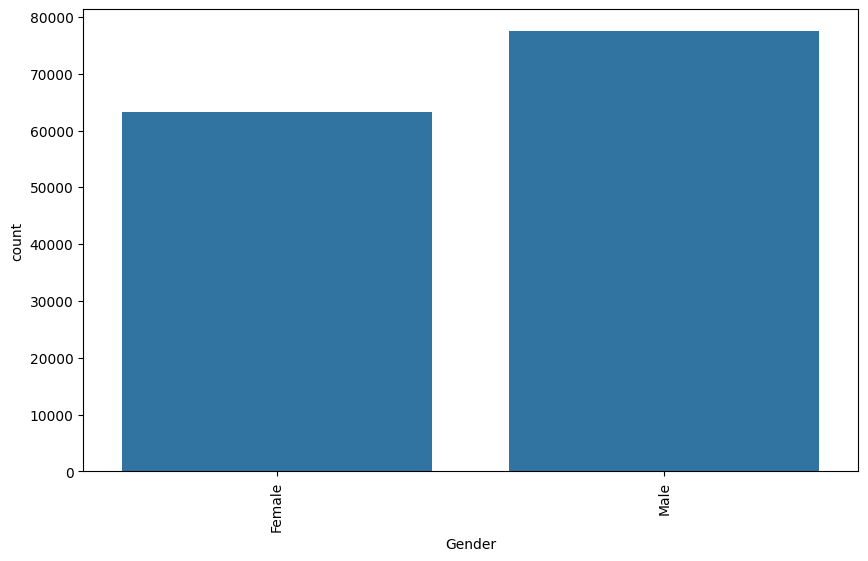

In [33]:
plot_categorical(data, 'Gender')

#### Insights:
- The dataset has more males than females
- This imbalance should be accounted for when performing gender-based analysis to avoid biased results

### City

#### Check missing values

In [34]:
check_missing_values(data, 'City')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [35]:
data['City'].describe()

count     140700
unique        98
top       Kalyan
freq        6591
Name: City, dtype: object

#### Visualizations

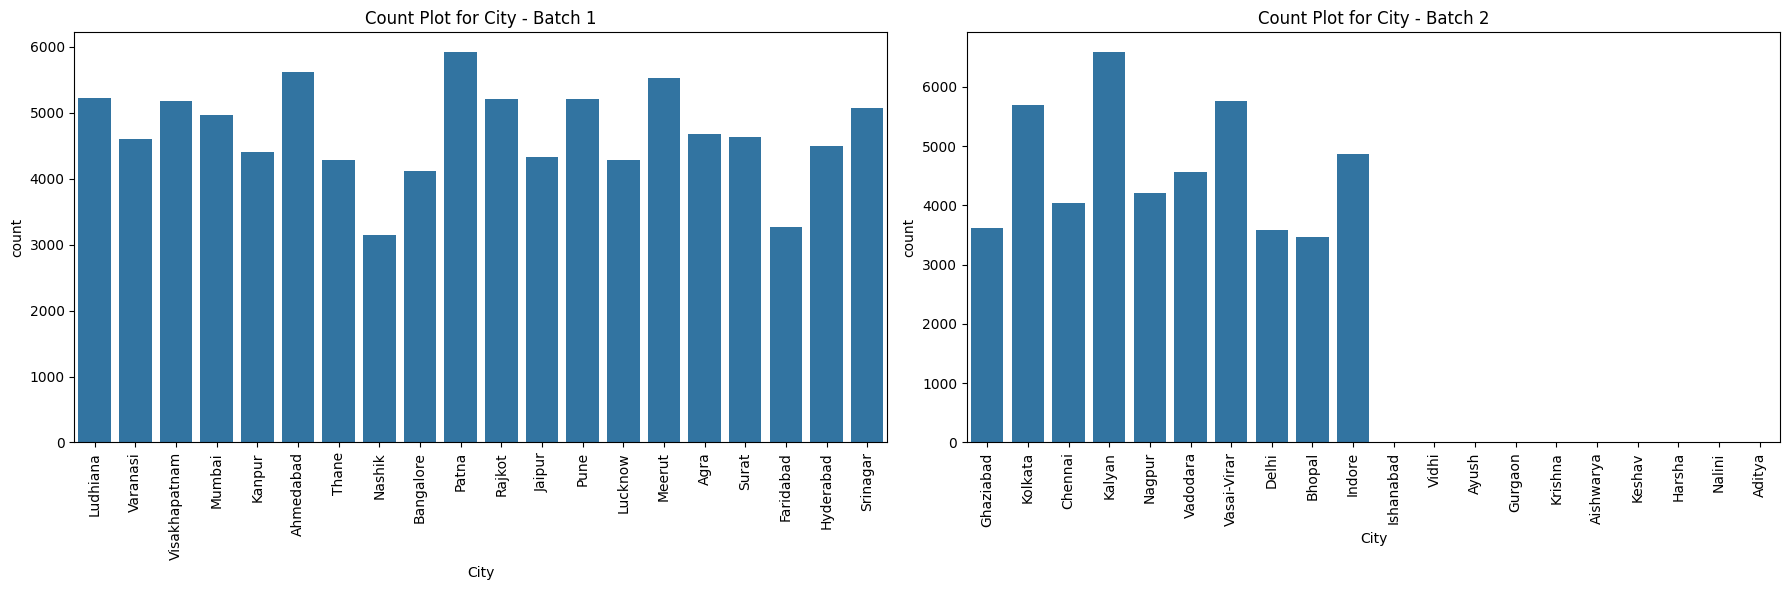

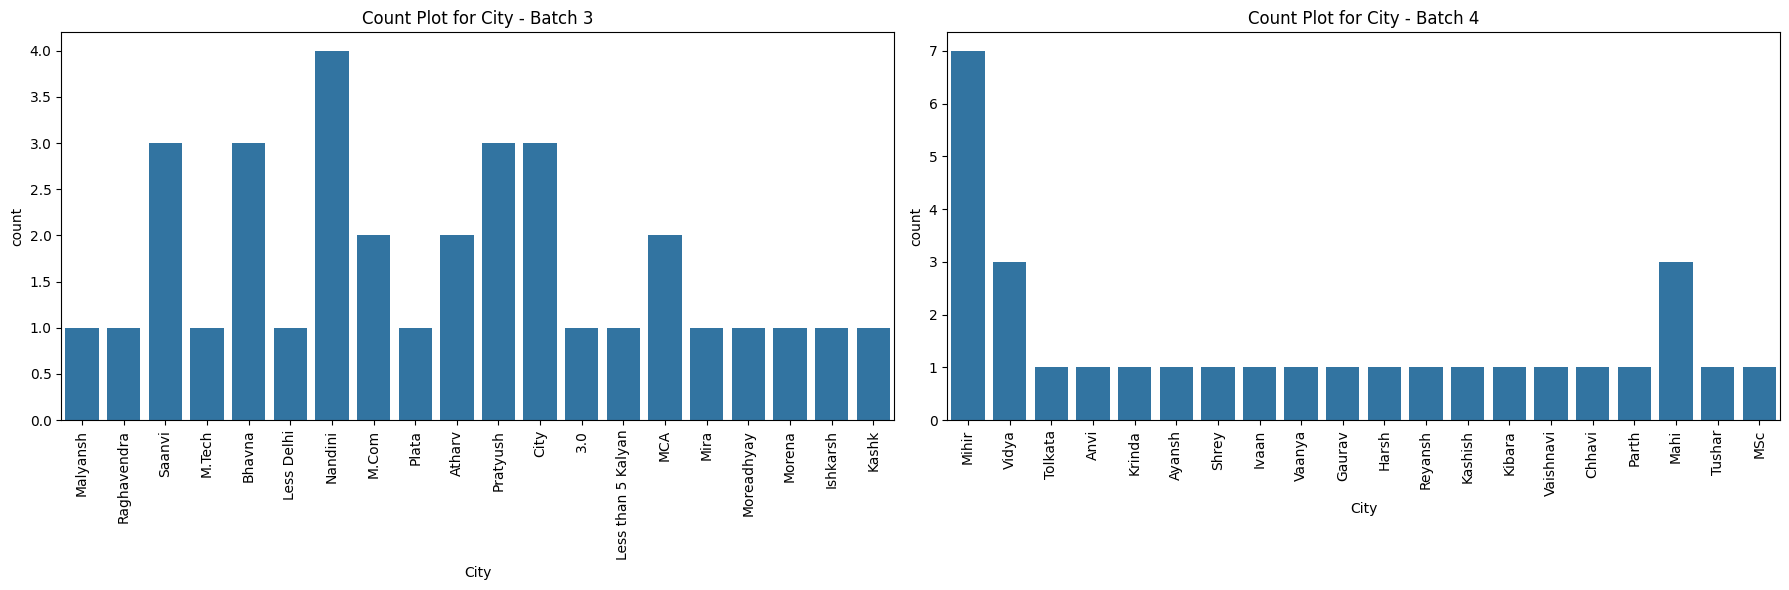

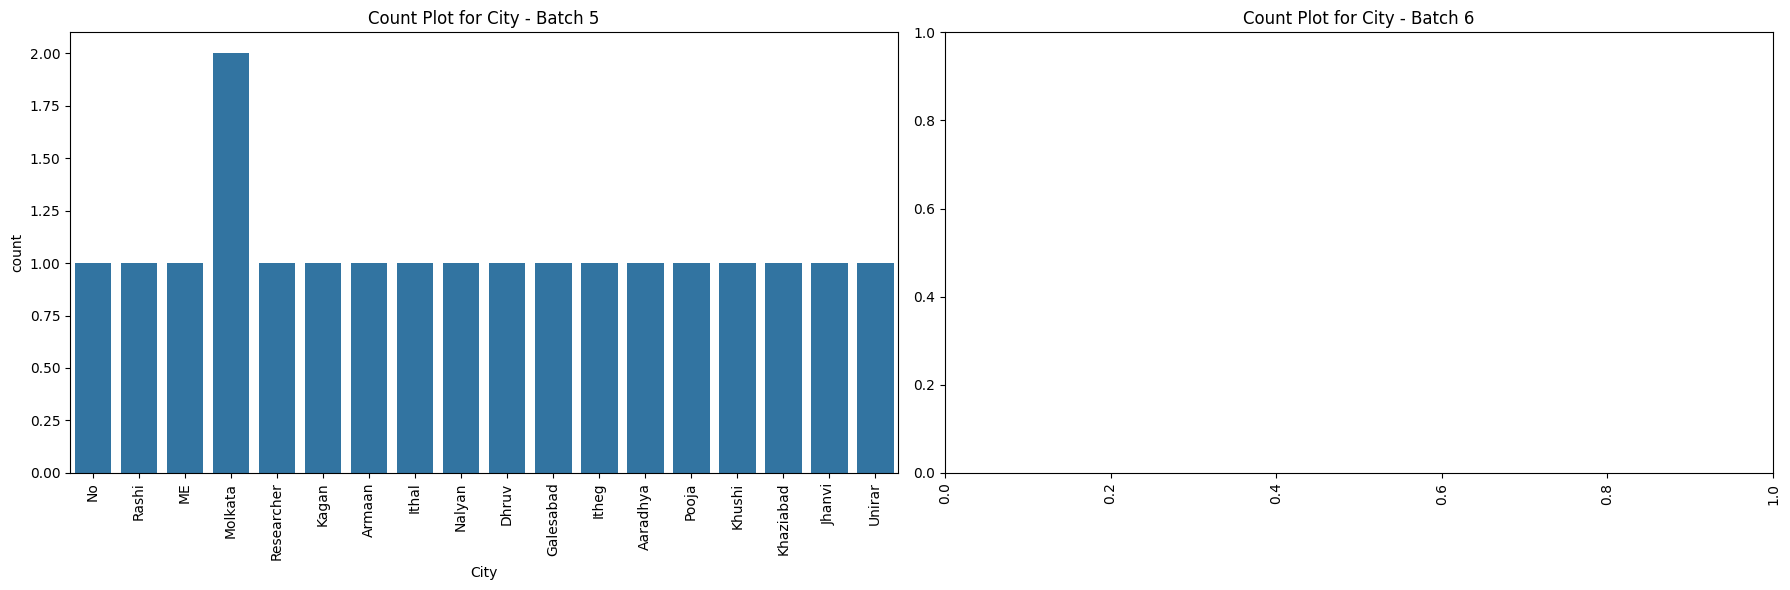

In [36]:
plot_categorical(data, 'City')

#### Insights:
- Certain cities dominate the dataset, such as Kalyan and Patna, while others have only a few observations. This imbalance could affect analyses involving city-specific comparisons

### Working Professional or Student

#### Check missing values

In [37]:
check_missing_values(data, 'Working Professional or Student')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [38]:
data['Working Professional or Student'].describe()

count                   140700
unique                       2
top       Working Professional
freq                    112799
Name: Working Professional or Student, dtype: object

#### Visualizations

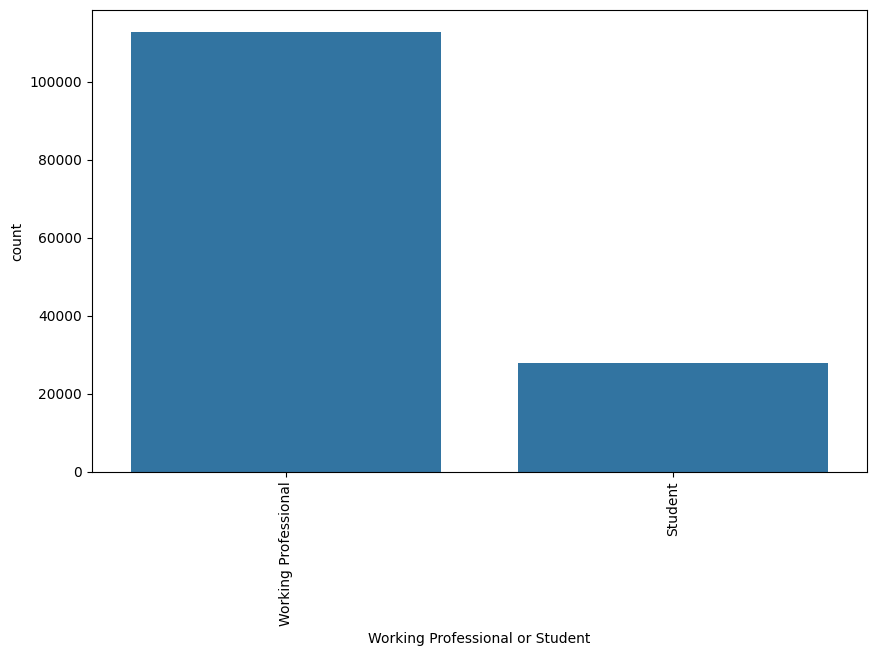

In [39]:
plot_categorical(data, 'Working Professional or Student')

#### Insights:
- The dataset is imbalanced, with 80% working professionals and 20% students

### Profession

#### Check missing values

In [40]:
check_missing_values(data, 'Profession')

Missing values count: 36630
Missing values percentage: 26.03%


#### Descriptive Statistics

In [41]:
data['Profession'].describe()

count      104070
unique         64
top       Teacher
freq        24906
Name: Profession, dtype: object

#### Visualizations

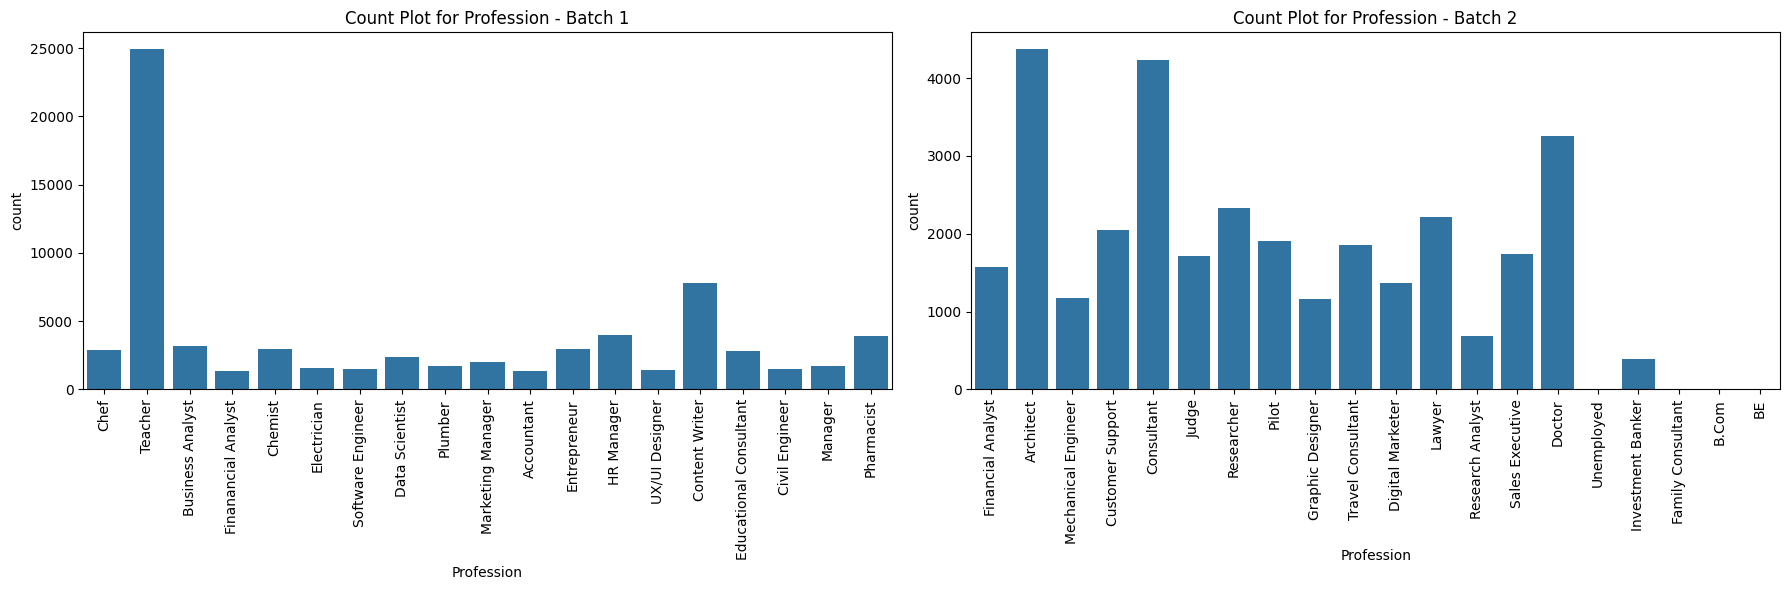

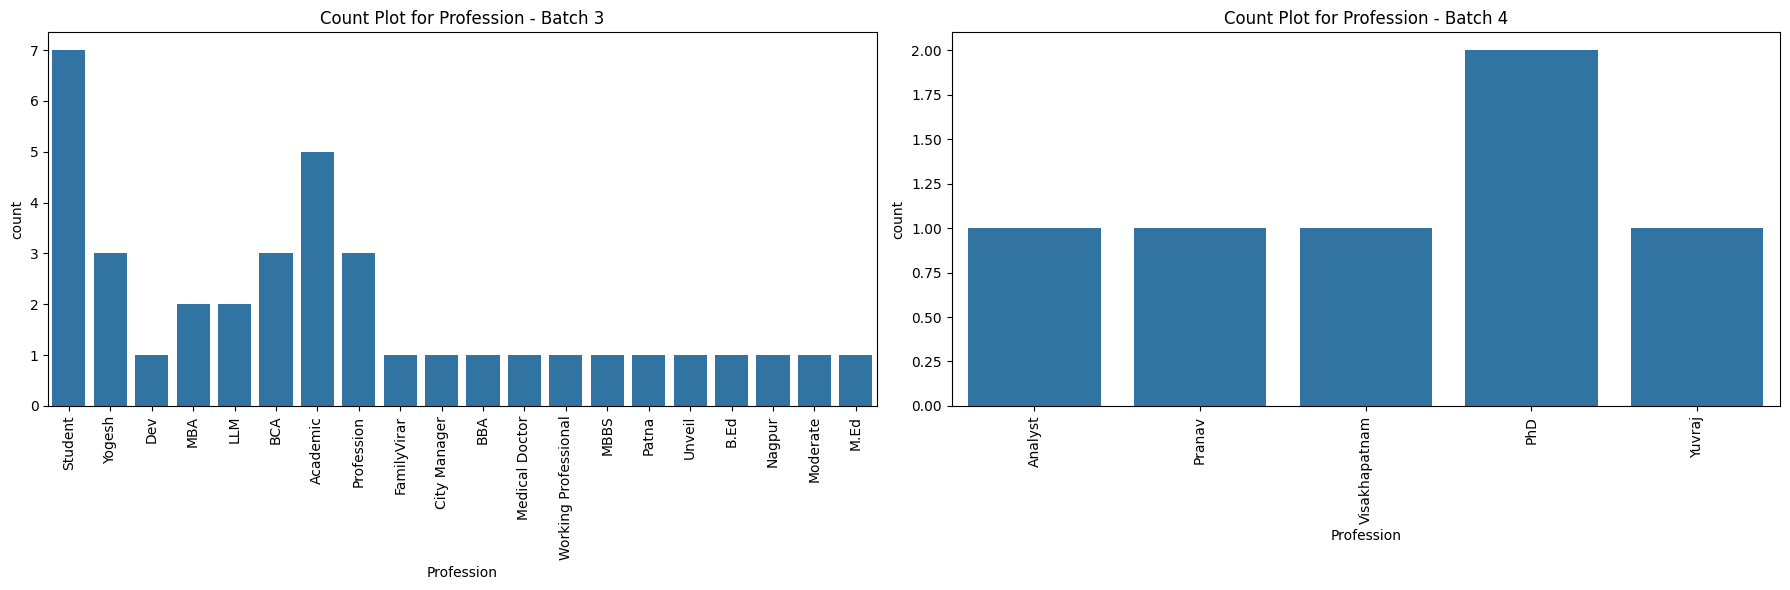

In [42]:
plot_categorical(data, 'Profession')

**Insights:**
- A few professions, such as Teacher and Content Writer, make up a large proportion of the data
- Many other professions are underrepresented, which may affect the reliability of analyses involving these roles
- The 26.03% missing data might correspond to individuals whose professions were not recorded or applicable.

### Sleep Duration

#### Check missing values

In [43]:
check_missing_values(data, 'Sleep Duration')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [44]:
data['Sleep Duration'].describe()

count                140700
unique                   36
top       Less than 5 hours
freq                  38784
Name: Sleep Duration, dtype: object

#### Visualizations

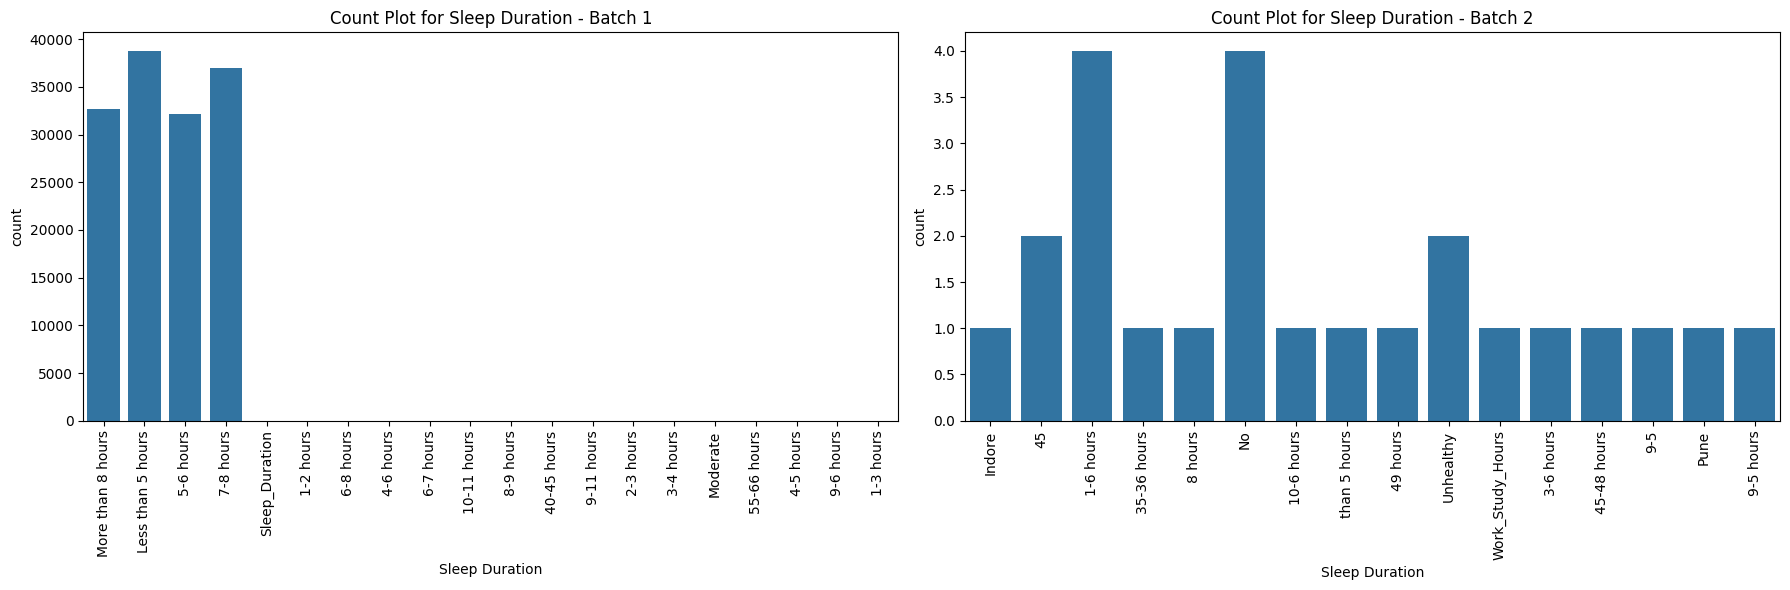

In [45]:
plot_categorical(data, 'Sleep Duration')

#### Insights:
- A significant portion of individuals reports sleeping less than 5 hours or 5-6 hours, suggesting that sleep deprivation may be prevalent in the dataset population

### Dietary Habits

#### Check missing values

In [46]:
check_missing_values(data, 'Dietary Habits')

Missing values count: 4
Missing values percentage: 0.0%


#### Descriptive Statistics

In [47]:
data['Dietary Habits'].describe()

count       140696
unique          23
top       Moderate
freq         49705
Name: Dietary Habits, dtype: object

#### Visualizations

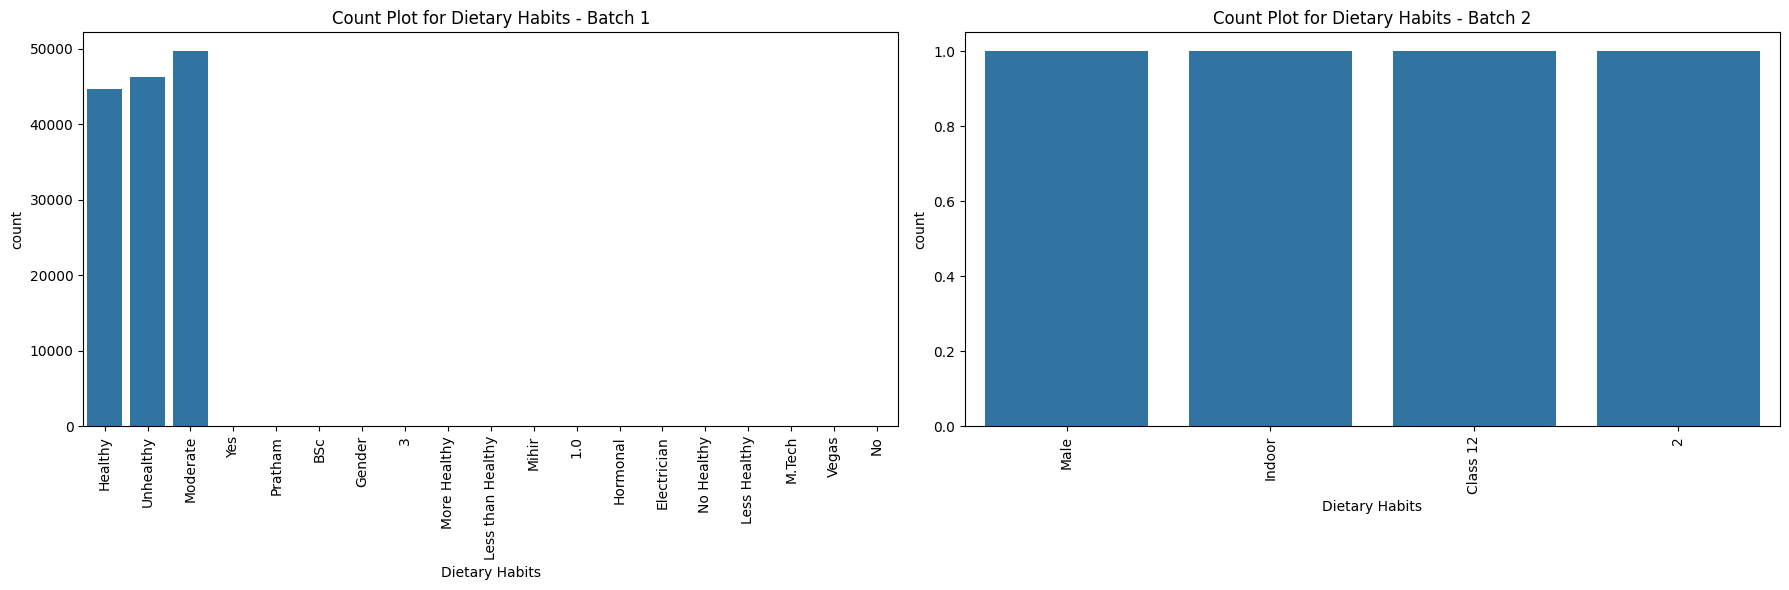

In [48]:
plot_categorical(data, 'Dietary Habits')

#### Insights:
- A significant portion of the population reports having a moderate diet, while smaller groups fall under healthy or unhealthy categories
- Many low-frequency categories could be grouped into another category (e.g., "Unknown") to simplify analysis and focus on meaningful patterns

### Degree

#### Check missing values

In [49]:
check_missing_values(data, 'Degree')

Missing values count: 2
Missing values percentage: 0.0%


#### Descriptive Statistics

In [50]:
data['Degree'].describe()

count       140698
unique         115
top       Class 12
freq         14729
Name: Degree, dtype: object

#### Visualizations

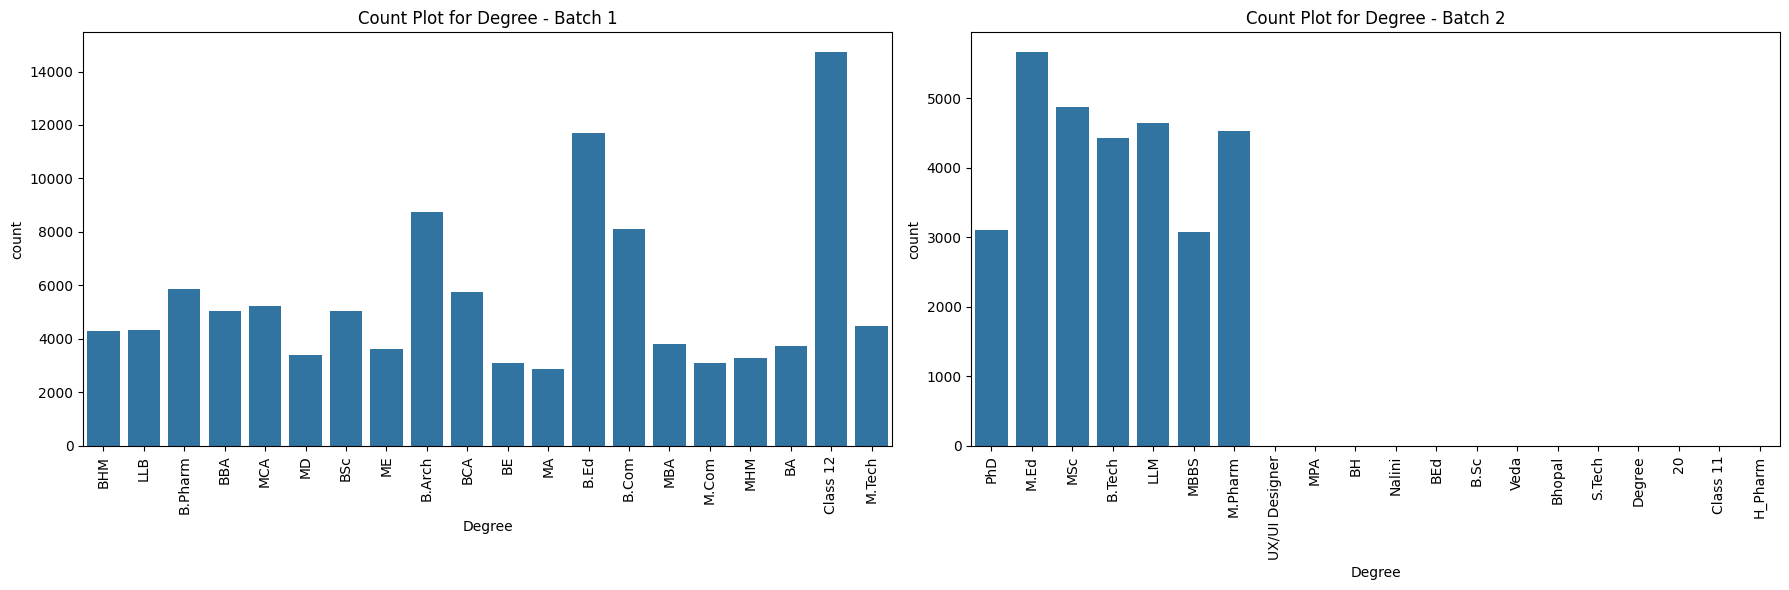

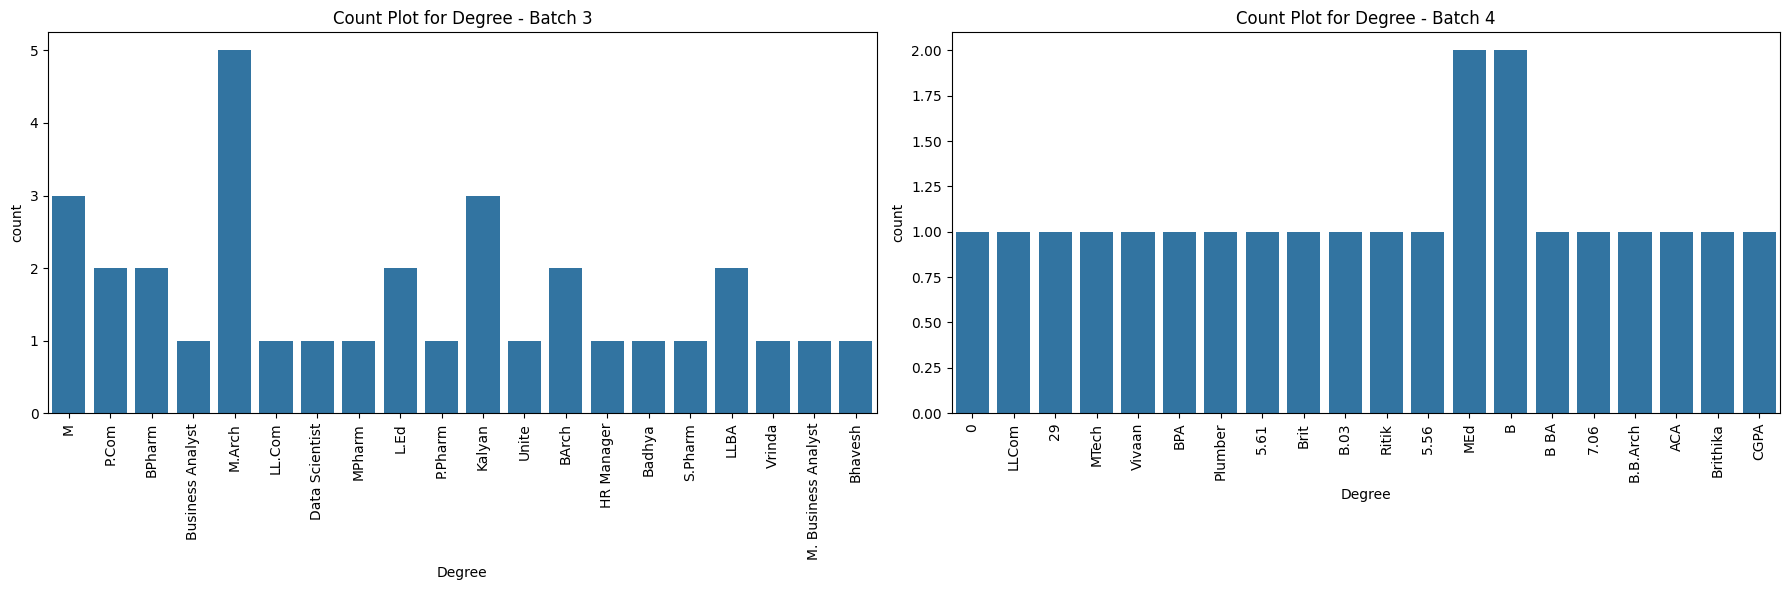

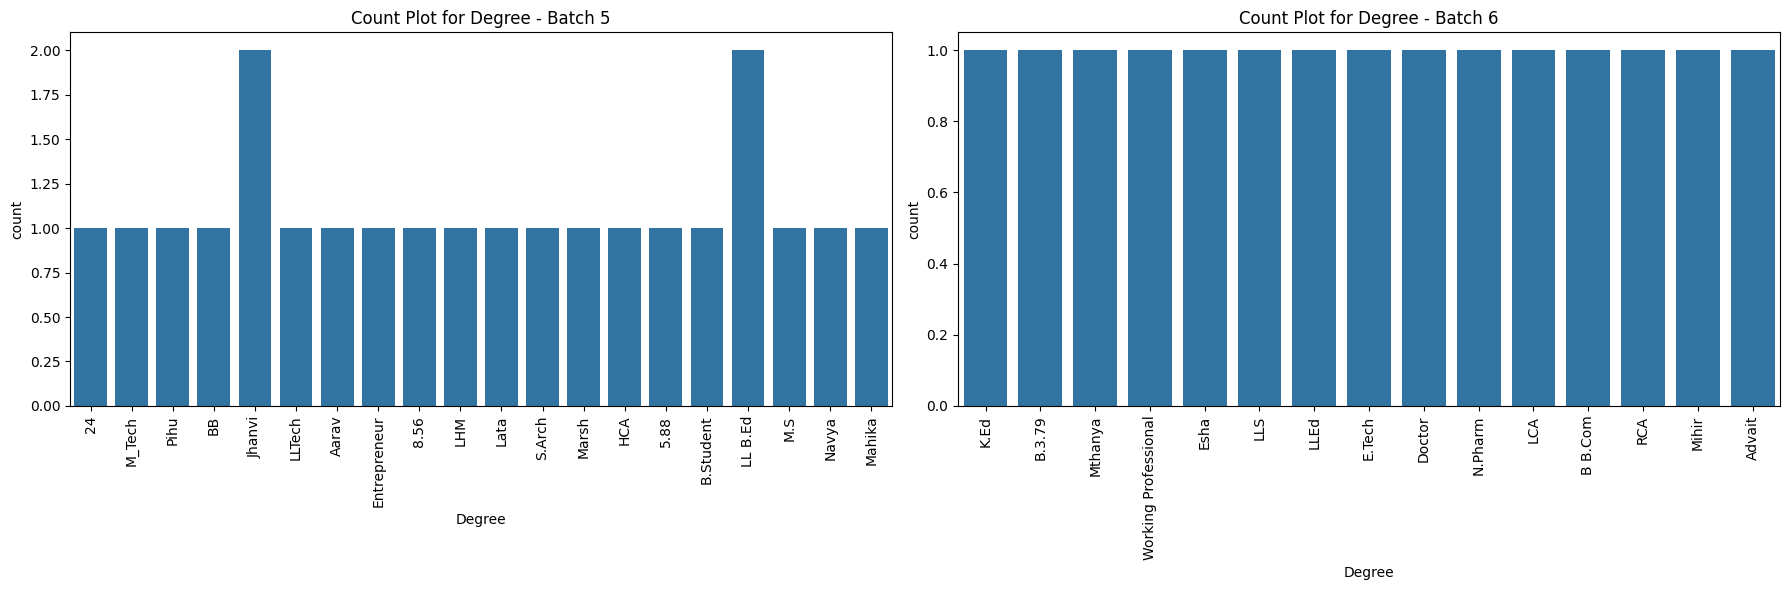

In [51]:
plot_categorical(data, 'Degree')

#### Insights:
- The dataset is dominated by a few common degrees, such as Class 12, B.Ed, and B.Arch, while other degrees have very low representation
- This imbalance might skew analyses unless grouped or filtered
- The dataset includes a wide range of degrees, reflecting a highly diverse population
- The presence of low-frequency degrees (e.g., niche certifications or advanced qualifications) indicates variability in the dataset.

### Have you ever had suicidal thoughts ?

#### Check missing values

In [52]:
check_missing_values(data, 'Have you ever had suicidal thoughts ?')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [53]:
data['Have you ever had suicidal thoughts ?'].describe()

count     140700
unique         2
top           No
freq       71138
Name: Have you ever had suicidal thoughts ?, dtype: object

#### Visualizations

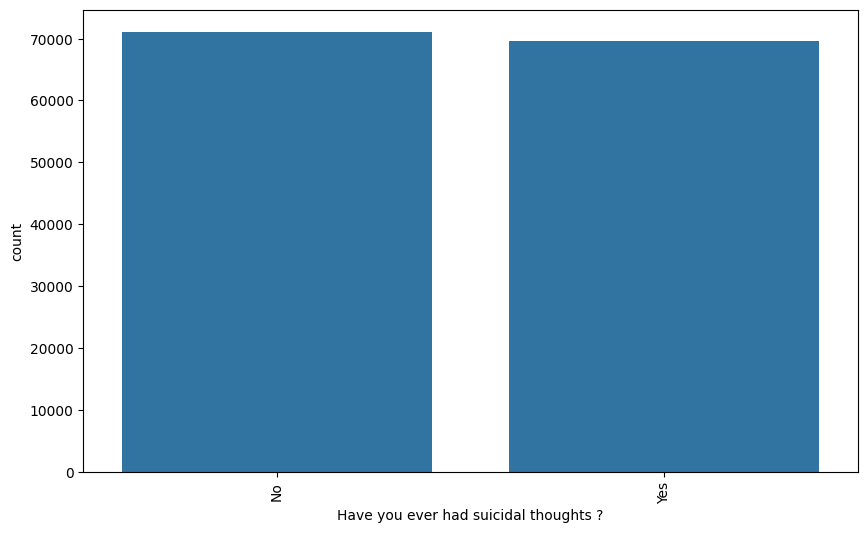

In [54]:
plot_categorical(data, 'Have you ever had suicidal thoughts ?')

#### Insights:
- Nearly 49.5% of respondents report having had suicidal thoughts, indicating a significant mental health concern in the dataset population
- The almost equal distribution between "Yes" and "No" responses makes this variable valuable for correlation and modeling, as it provides sufficient representation for both groups

### Family History of Mental Illness

#### Check missing values

In [55]:
check_missing_values(data, 'Family History of Mental Illness')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [56]:
data['Family History of Mental Illness'].describe()

count     140700
unique         2
top           No
freq       70758
Name: Family History of Mental Illness, dtype: object

#### Visualizations

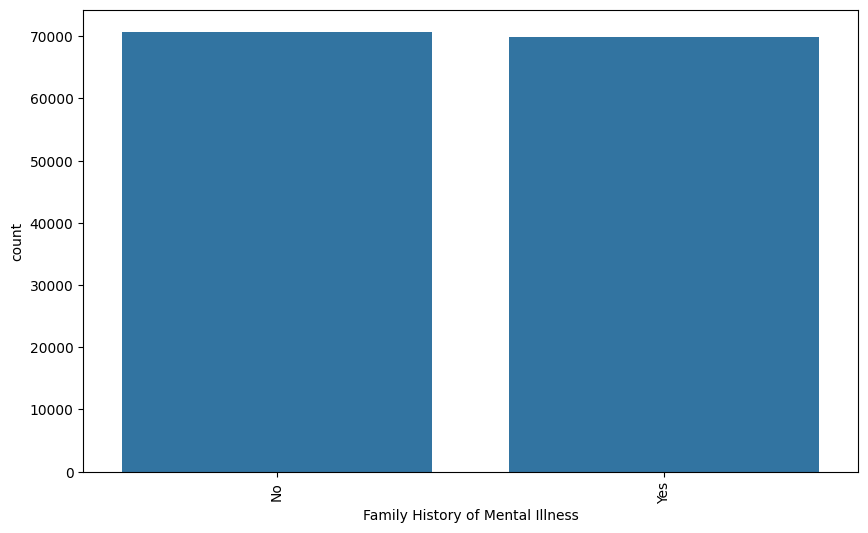

In [57]:
plot_categorical(data, 'Family History of Mental Illness')

#### Insights:
- Approximately 49.7% of respondents report a family history of mental illness, indicating a significant proportion of the population may have genetic or environmental predispositions to mental health challenges

### Depression

#### Check missing values

In [58]:
check_missing_values(data, 'Depression')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [59]:
data['Depression'].describe()

count     140700
unique         2
top            0
freq      115133
Name: Depression, dtype: int64

#### Visualizations

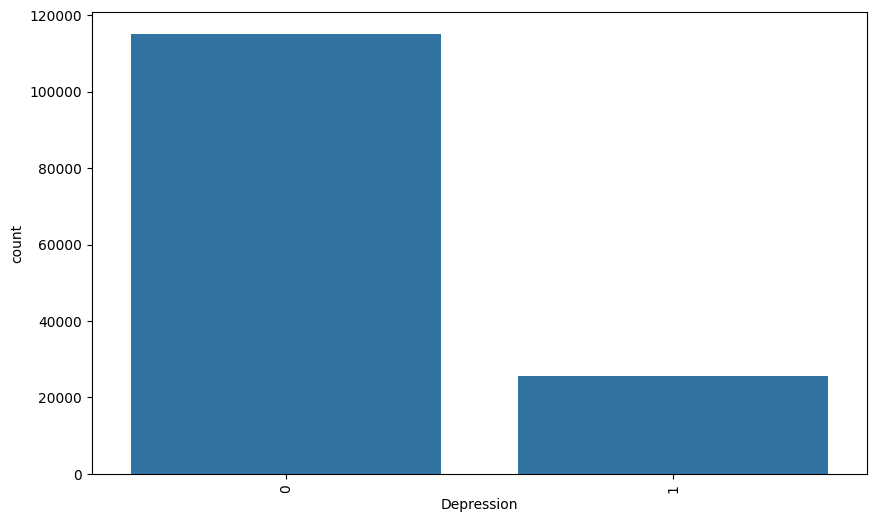

In [60]:
plot_categorical(data, 'Depression')

#### Insights:
- Although a majority (81.8%) of respondents are not classified as depressed, the 18.2% depression rate indicates a notable prevalence in the dataset population
- This highlights the importance of investigating factors contributing to depression and potential interventions

## Data Preperation
### Handling Missing Values
#### Academic Pressure, CGPA and Study Satisfaction
For features such as `Academic Pressure`, `CGPA`, and `Study Satisfaction` that are relevant only to students, we will assign a value of `-1` (a value outside the observed range for these attributes) to signify that they are not applicable to working professionals. For missing values in student records, we will impute the data using the median of the respective feature. Additionally, we will create a new indicator feature to specify whether the replaced feature is applicable for each record, ensuring better interpretability and clarity.

In [61]:
data = handle_group_specific_missing_values(data, 
                                            columns=["Academic Pressure","CGPA","Study Satisfaction"], 
                                            group_column="Working Professional or Student",
                                            group_value="Student")

#### Work Pressure and Job Satisfaction
These features are specific to working professionals; therefore, students will be assigned a value of `-1`, a placeholder outside the observed range. Missing values for working professionals will be imputed using the median. To enhance interpretability and clarity, we will also introduce a new indicator feature that flags whether the feature is applicable to each record.

In [62]:
data = handle_group_specific_missing_values(data, 
                                            columns=["Work Pressure", "Job Satisfaction"],
                                            group_column="Working Professional or Student",
                                            group_value="Working Professional")

#### Profession
Given the significant number of missing values for this feature, it is likely applicable primarily to working professionals. To address these missing values, we will introduce two new categories: 'Unknown' to represent missing data for professionals and 'Student' to indicate missing data for students. This approach ensures clearer differentiation and better handling of the missing values.

In [63]:
fill_values = {
    'Working Professionals': 'Unknown',
    'Student': 'Student'
}
data = handle_profession_missing_values(data, fill_values)

#### Financial Stress 
With 4 missing values in this attribute, we will handle the missing data by imputing it with the median to maintain the distribution's central tendency 

In [64]:
data = handle_financial_stress_missing_values(data)

#### Dietary Habits and Degree
These two attributes have a small number of missing values: 4 for 'Dietary Habits' and 2 for 'Degree.' Since both are categorical variables, we will address the missing data by imputing them with their respective mode, preserving the most frequently occurring category in each case and ensuring consistency within the dataset

In [65]:
columns_to_impute = ['Degree', 'Dietary Habits']
data = handle_categorical_missing_values(data, columns_to_impute)

### Handling Outliers
The categorical variables 'Profession,' 'City,' 'Sleep Duration,' 'Dietary Habits,' and 'Degree' exhibit potential outliers, with some categories having a frequency of approximately 20 or fewer, suggesting they may represent noise. To address this, we will create a new category, 'Other,' for each of these variables. This category will consolidate all infrequent categories with fewer than 20 records, improving data representation and reducing the impact of sparsely populated categories on the analysis.

In [66]:
columns_to_handle_outliers = ['Profession', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree' ]
data = handle_categorical_outliers(data, columns=columns_to_handle_outliers, threshold=20) 

## Bivariate Analysis

### Age vs. Depression

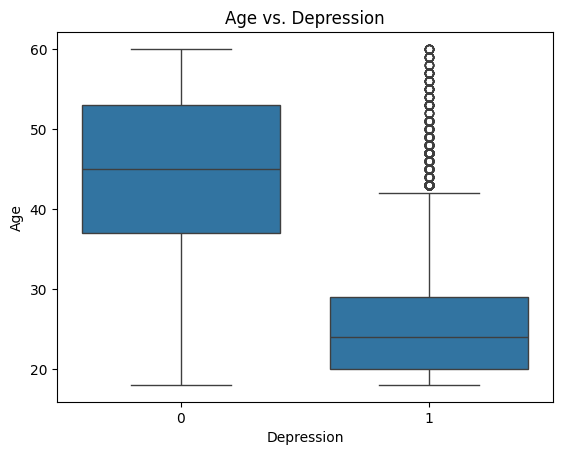

In [67]:
plot_numerical_vs_categorical(data, 'Age', 'Depression')

#### Insights:
- The boxplot for the "Depressed" category shows that individuals classified as "Depressed" tend to belong to a younger age group. The median age of depressed individuals is notably lower compared to the "Not Depressed" group
- The interquartile range (IQR) for depressed individuals spans primarily from the early 20s to late 20s, indicating that depression is more prevalent among younger individuals
- The "Not Depressed" group displays a wider age distribution, with the median age falling around the mid-40s. This suggests that older individuals are less likely to report depression compared to younger counterparts
- The "Depressed" category exhibits outliers at the higher end of the age range, indicating that while depression is less common among older individuals, it is not absent. These outliers could represent specific cases influenced by other factors, such as financial stress
- These trends may reflect the challenges faced by younger individuals, such as academic stress or early career struggles. In contrast, older individuals might have more stable lives and coping mechanisms

### Academic Pressure vs. Depression

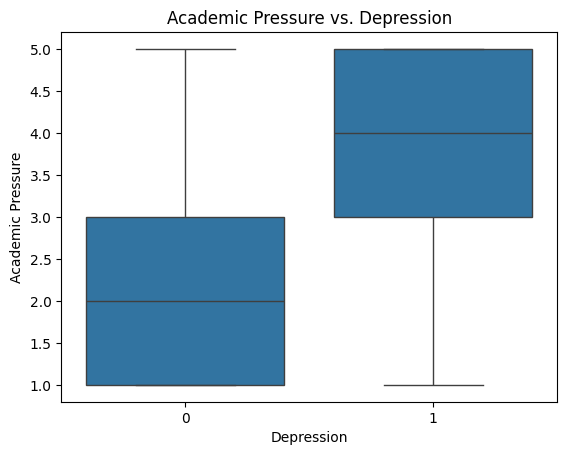

In [68]:
plot_numerical_vs_categorical(data[data['Academic Pressure'] != -1], 'Academic Pressure', 'Depression')

#### Insights:
- The median academic pressure is higher for students classified as "Depressed" compared to those in the "Not Depressed" category
- The interquartile range (IQR) for depressed students spans primarily from 3 to 5, indicating that a significant portion of these students experience moderate to high academic pressure
- Students in the "Not Depressed" group exhibit lower academic pressure levels, with the IQR falling between 1 and 3, and the median around 2
- This suggests that students experiencing lower academic pressure are less likely to report depression
- Both groups have similar overall ranges, but depressed students consistently report higher academic pressure scores compared to their not-depressed counterparts
- The observed trend implies a strong association between higher academic pressure and depression, suggesting that elevated academic demands may contribute to mental health challenges among students.

### Work Pressure vs. Depression

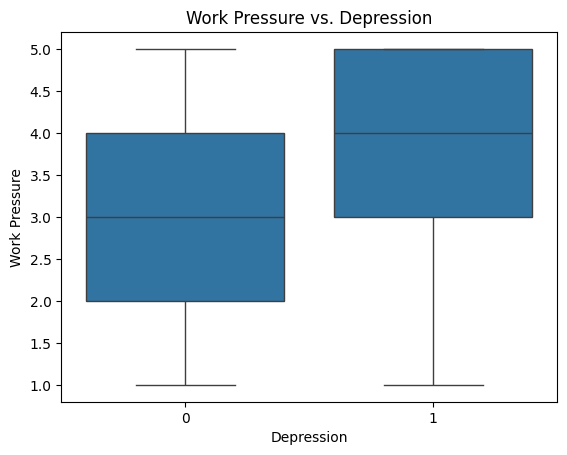

In [69]:
plot_numerical_vs_categorical(data[data['Work Pressure'] != -1], 'Work Pressure', 'Depression')

#### Insights:
- The median work pressure for individuals categorized as depressed is higher compared to those not depressed. This suggests that individuals experiencing higher levels of work pressure are more likely to report being depressed
- The interquartile range (IQR) for the depressed group is larger, indicating more variability in work pressure among these individuals
- This could suggest that depression affects or is affected by different levels of work pressure within the group
- Despite the clear difference in medians, there is still considerable overlap in the distribution of work pressure for both groups, suggesting that work pressure is not the sole determinant of depression

### Gender vs. Depression

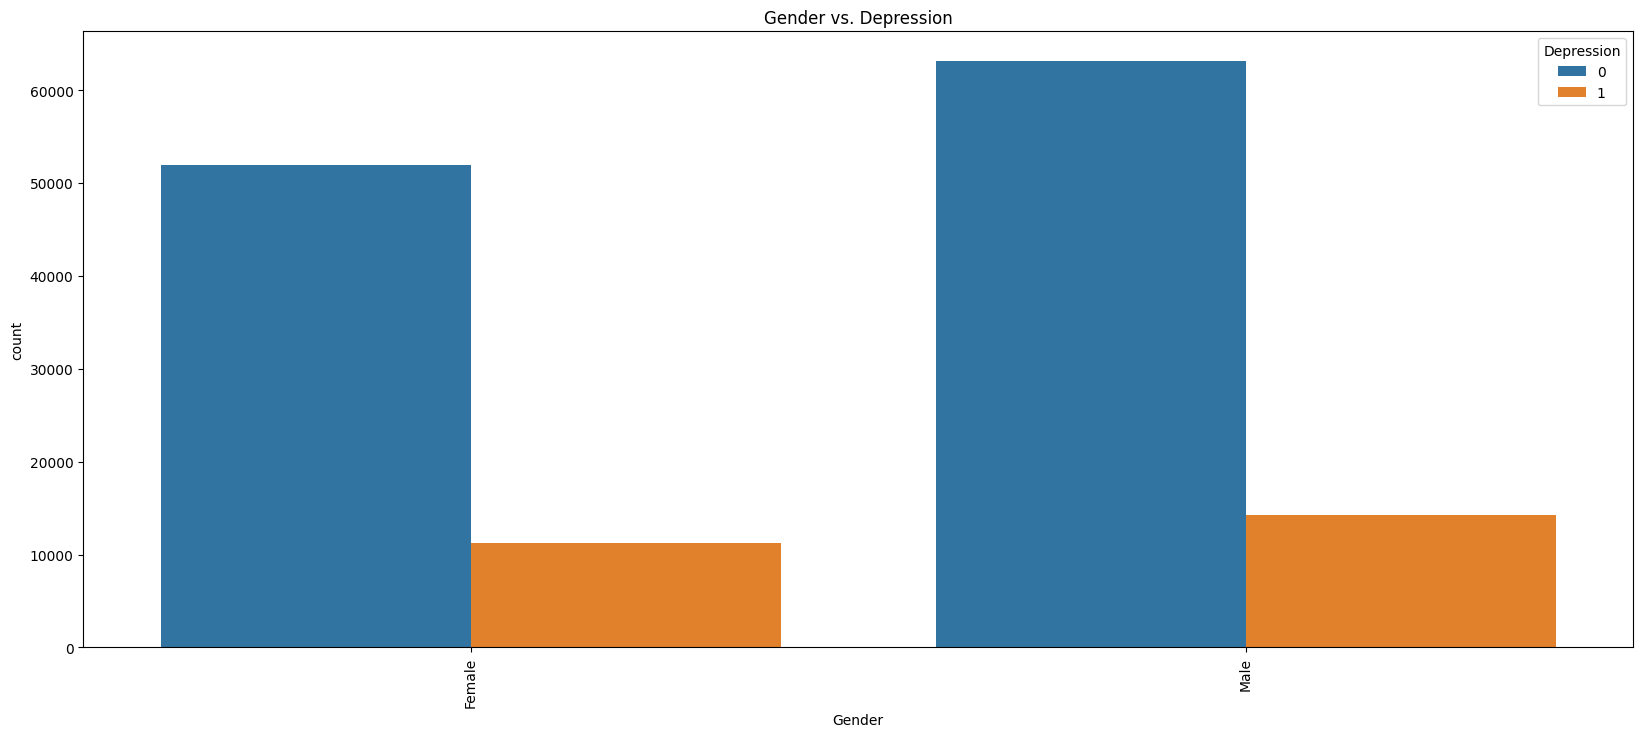

In [70]:
plot_categorical_vs_categorical(data, 'Gender', 'Depression')

#### Insights:
- Both males and females have a significantly higher count in the "Not Depressed" category compared to the "Depressed" category. This indicates that most individuals in the dataset are not experiencing depression
- There is a slight difference in the "Depressed" category, with males showing a marginally higher count of depression cases than females

### City vs. Depression

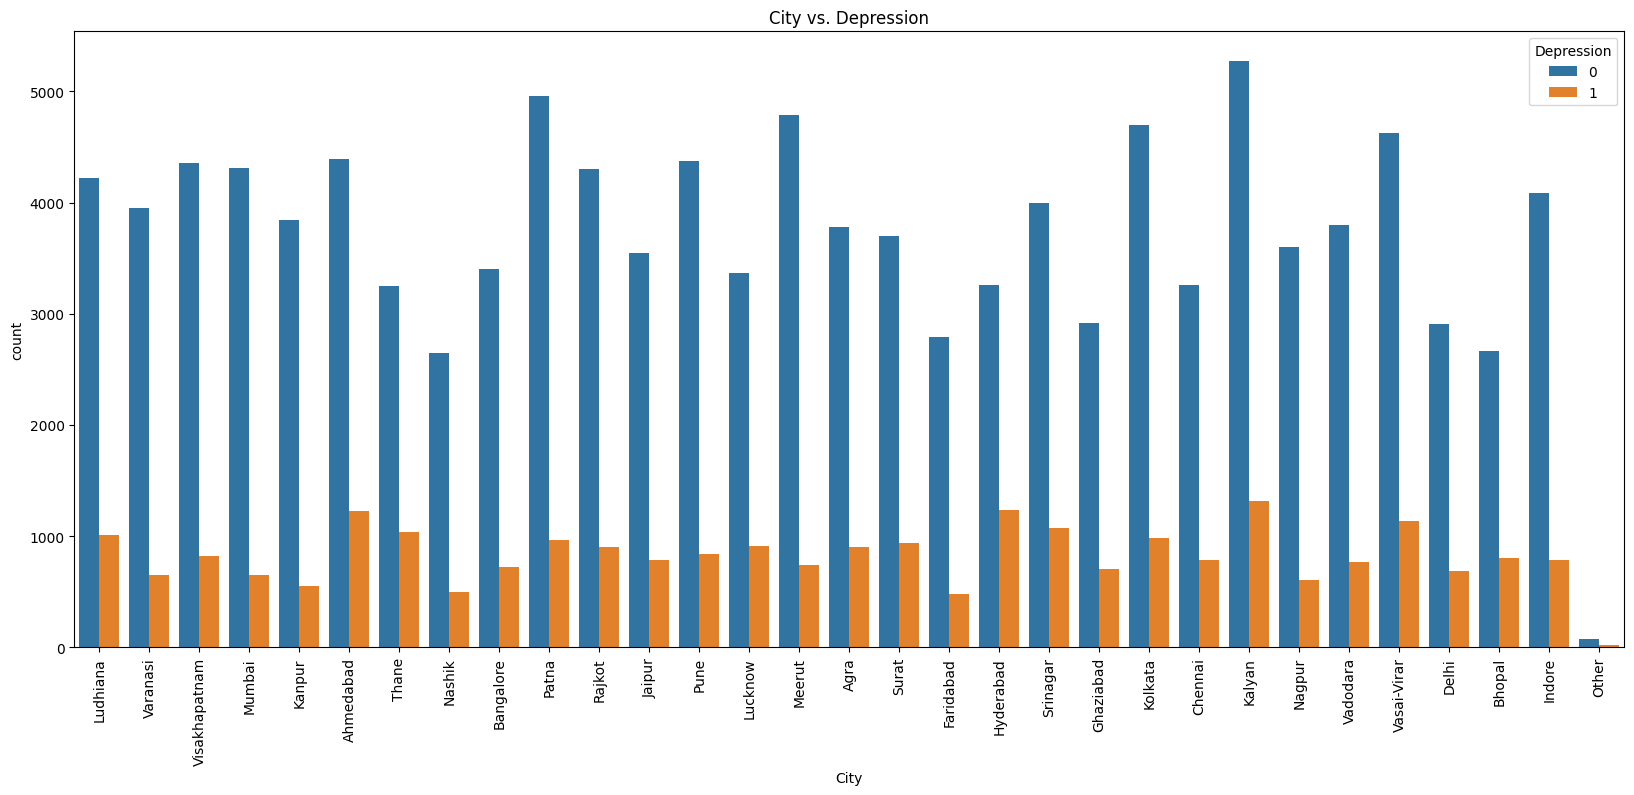

In [71]:
plot_categorical_vs_categorical(data, 'City', 'Depression', batched=False)

#### Insights:
- Across most cities, the "Not Depressed" population significantly outnumbers the "Depressed" population. This suggests a general trend of lower reported depression levels across cities
- Certain cities, such as Ahmedabad, Hyderabad, and Kalyan, show relatively higher counts of "Depressed" individuals compared to other cities
- This could indicate specific local factors or stressors contributing to higher depression rates in these areas
- Cities like Varanasi, Kanpur, and Nashik have relatively smaller "Depressed" populations in comparison to their "Not Depressed" counterparts
- These cities may exhibit characteristics such as stronger community bonds, lower stress levels, or underreporting of depression
- The "Other" category shows minimal counts for both "Depressed" and "Not Depressed," possibly due to fewer individuals being classified in this category

### Working Professional or Student vs. Depression

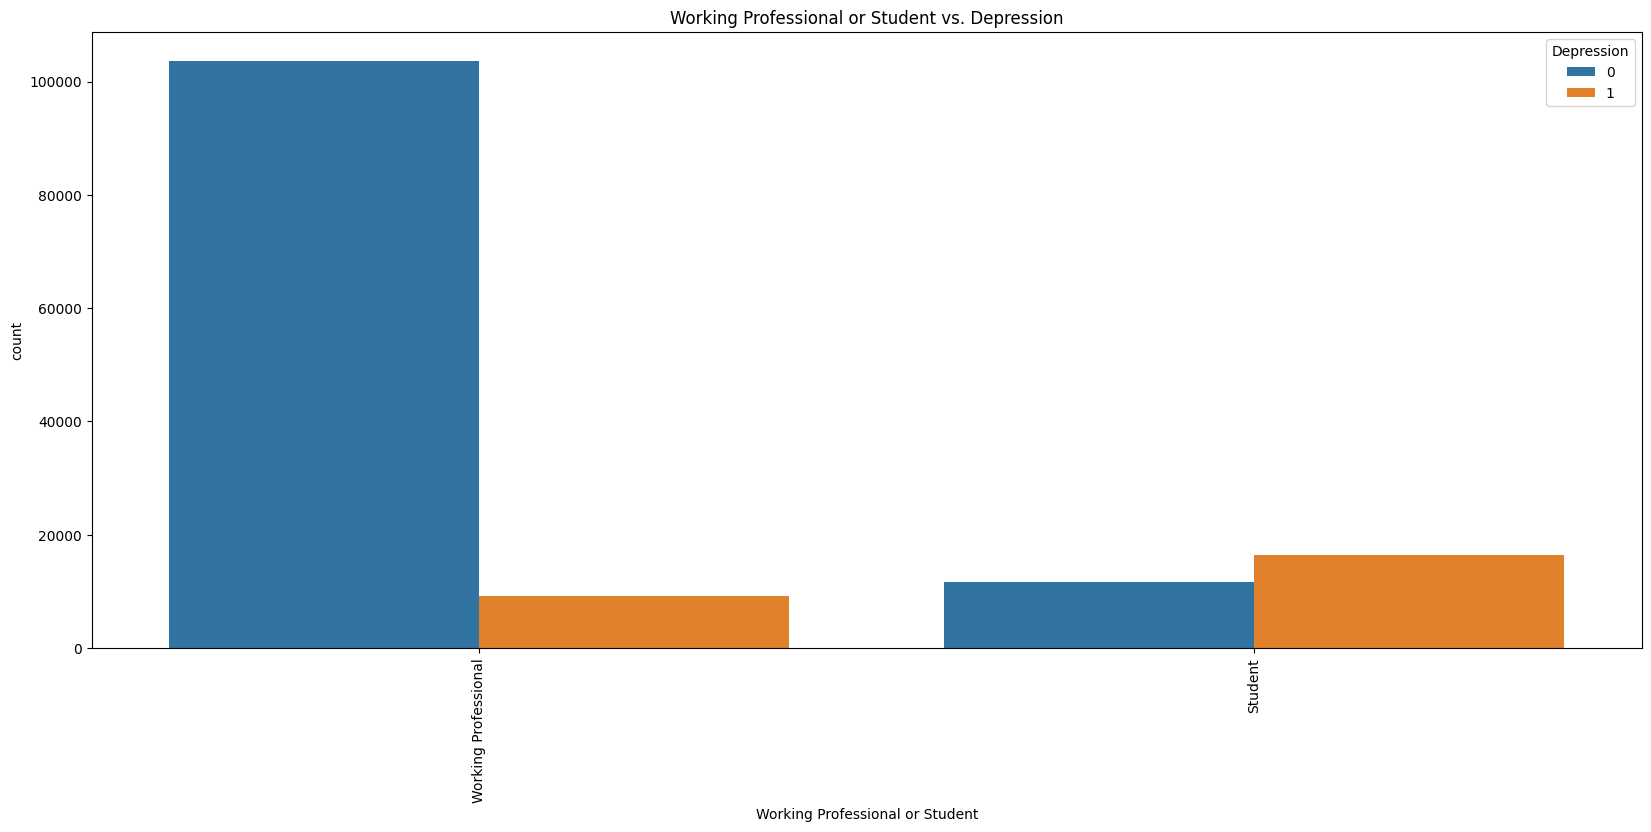

In [72]:
plot_categorical_vs_categorical(data, 'Working Professional or Student', 'Depression')

#### Insights:
- The majority of the population in the dataset are working professionals, as shown by the significantly taller blue bar for "Not Depressed" and the corresponding smaller orange bar for "Depressed" in this group
- For students, the orange bar (Depressed) is relatively higher in proportion compared to their "Not Depressed" counterparts when compared to the working professionals group. This suggests that students might experience depression at a higher relative rate compared to working professionals
- While working professionals dominate in absolute numbers, students seem to be more vulnerable to depression on a relative scale

### Profession vs. Depression

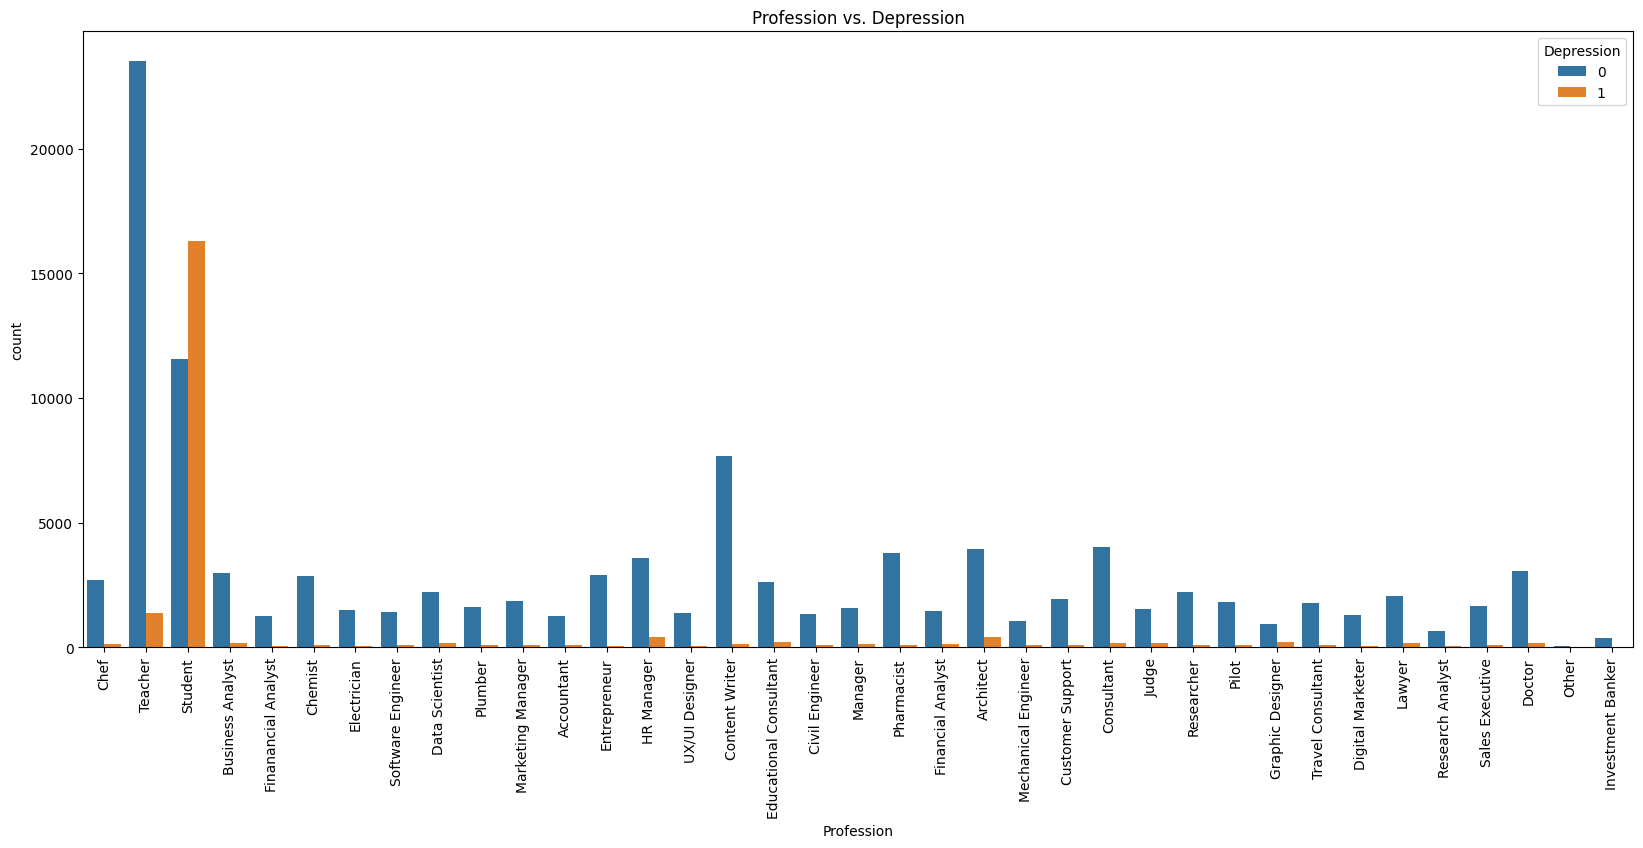

In [73]:
plot_categorical_vs_categorical(data, 'Profession', 'Depression', batched=False)

#### Insights:
- The student group shows a significant proportion of depression. This indicates that students are particularly vulnerable to depression compared to other professions
- Teachers have a high count overall but show a smaller proportion of depression compared to their "Not Depressed" group. This suggests that while teachers experience some level of stress, it may not be as significant a factor for depression relative to their population size

### CGPA vs. Depression

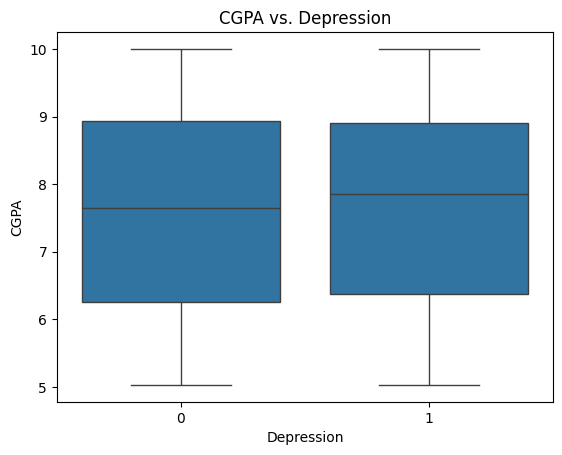

In [74]:
plot_numerical_vs_categorical(data[data['CGPA'] != -1], 'CGPA', 'Depression')

#### Insights:
- he CGPA distributions for "Depressed" and "Not Depressed" groups are very similar
- Both groups have a median CGPA around 8, with no noticeable shift in central tendency between the two categories
- The interquartile range (IQR) and the overall range of CGPA values are almost identical for both groups
- There is no clear indication that CGPA values differ significantly based on whether individuals are depressed or not
- CGPA does not appear to be a strong predictor or factor related to depression within this dataset

### Study Satisfaction vs. Depression

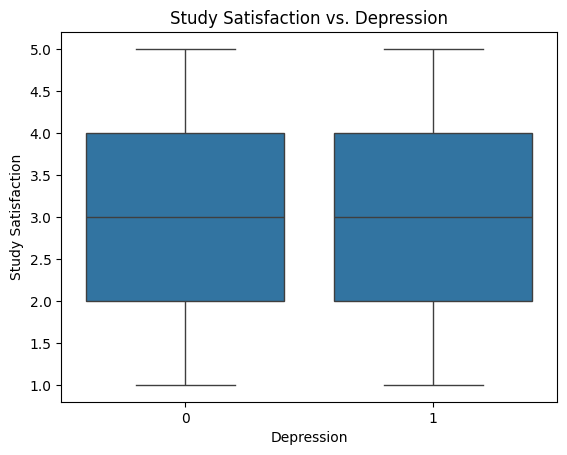

In [75]:
plot_numerical_vs_categorical(data[data['Study Satisfaction'] != -1], 'Study Satisfaction', 'Depression')

#### Insights:
- The median study satisfaction for both "Depressed" and "Not Depressed" groups is around 3.0, indicating that the central tendency is similar
- Both groups have an interquartile range (IQR) spanning from around 2.0 to 4.0, suggesting that the middle 50% of the data overlaps significantly
- The range of study satisfaction for both groups is identical, stretching from 1 (lowest satisfaction) to 5 (highest satisfaction)
- There is no clear difference in variability between the two groups
- Study satisfaction does not show a strong distinction between individuals who are depressed and those who are not. Both groups demonstrate similar distributions in satisfaction levels
- Hence, Study satisfaction alone might not be a major differentiating factor or predictor for depression

### Job Satisfaction vs. Depression

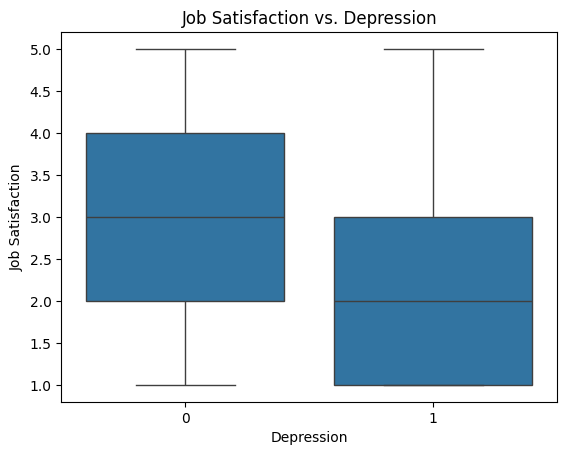

In [76]:
plot_numerical_vs_categorical(data[data['Job Satisfaction'] != -1], 'Job Satisfaction', 'Depression')

#### Insights:
- Individuals who are "Not Depressed" have a higher median job satisfaction compared to those who are "Depressed"
- The median satisfaction for "Not Depressed" individuals is 3.0, whereas for "Depressed" individuals, it is 2.0
- The interquartile range (IQR) for "Not Depressed" individuals is wider and shifted towards higher job satisfaction levels (around 3 to 4), suggesting overall higher satisfaction in this group
- The "Depressed" group has a lower IQR, predominantly spanning from 1 to 3, indicating a clustering of individuals with lower job satisfaction
- Both groups have similar ranges, with values from 1 (minimum) to 5 (maximum), though satisfaction scores for "Not Depressed" individuals are more evenly spread across the higher end of the scale
- There is a clear association between job satisfaction and depression. Lower job satisfaction appears to be linked to a higher likelihood of depression

### Sleep Duration vs. Depression

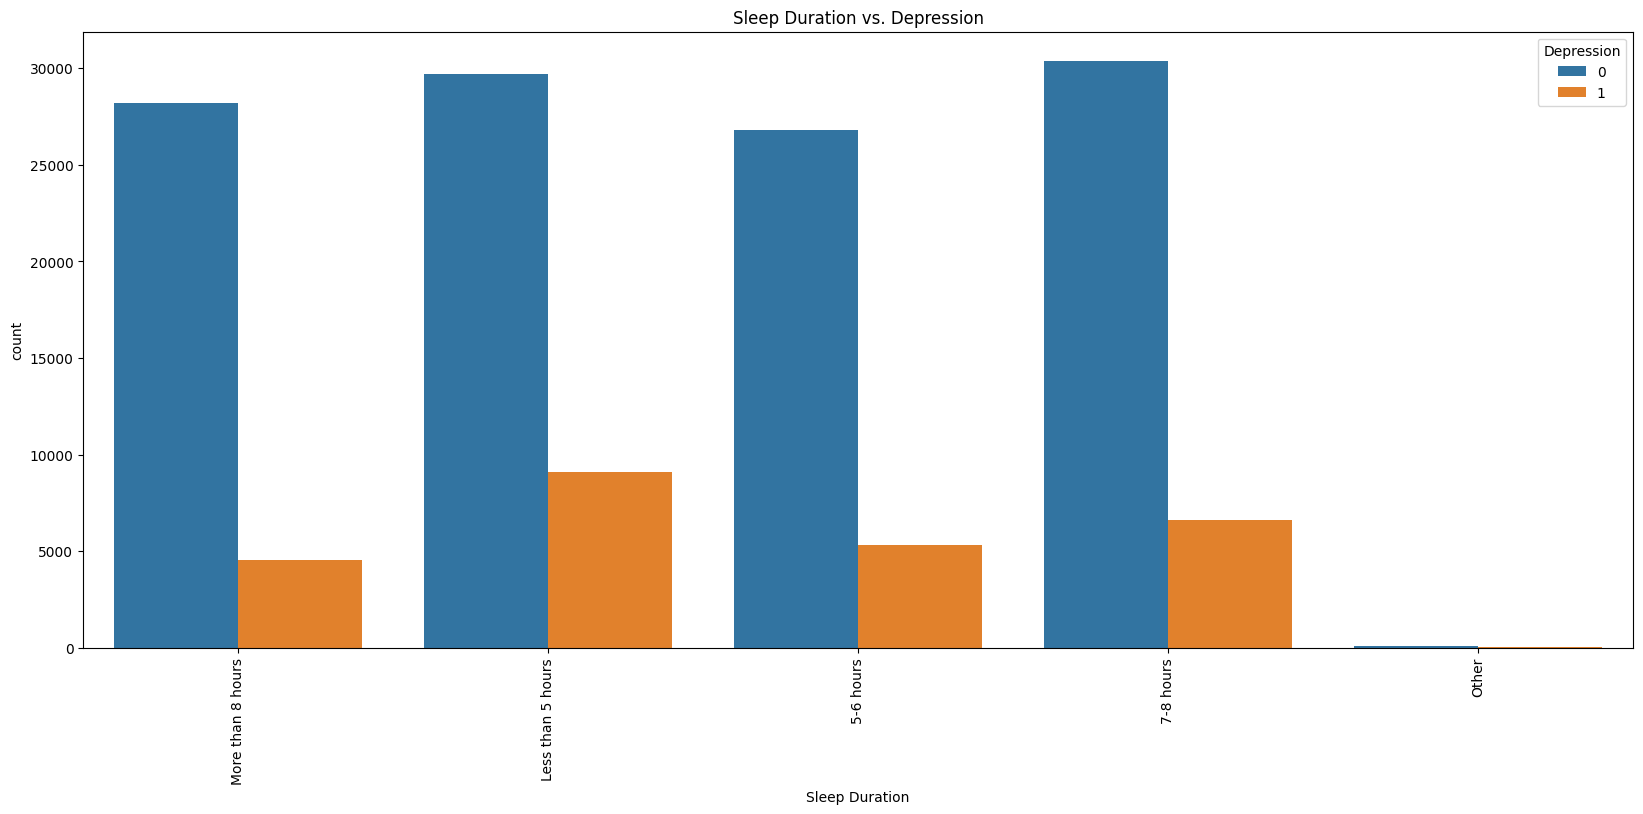

In [77]:
plot_categorical_vs_categorical(data, 'Sleep Duration', 'Depression')

#### Insights:
- Individuals who sleep less than 5 hours show a significantly higher proportion of depression compared to other sleep duration categories
- The majority of individuals who are "Not Depressed" fall under the 7–8 hours sleep duration categories, suggesting this is the most common healthy sleep durations
- The "More than 8 hours" and "5–6 hours" sleep categories have the lowest proportion of depressed individuals
- Shorter sleep durations, such as "Less than 5 hours," appear to be associated with a higher likelihood of depression
- A balanced or adequate sleep duration (7–8 hours) seems to correlate with mental well-being, with fewer individuals reporting depression
- The "Other" category has very few data points, and its contribution to the analysis might be limited or ambiguous

### Dietary Habits vs. Depression

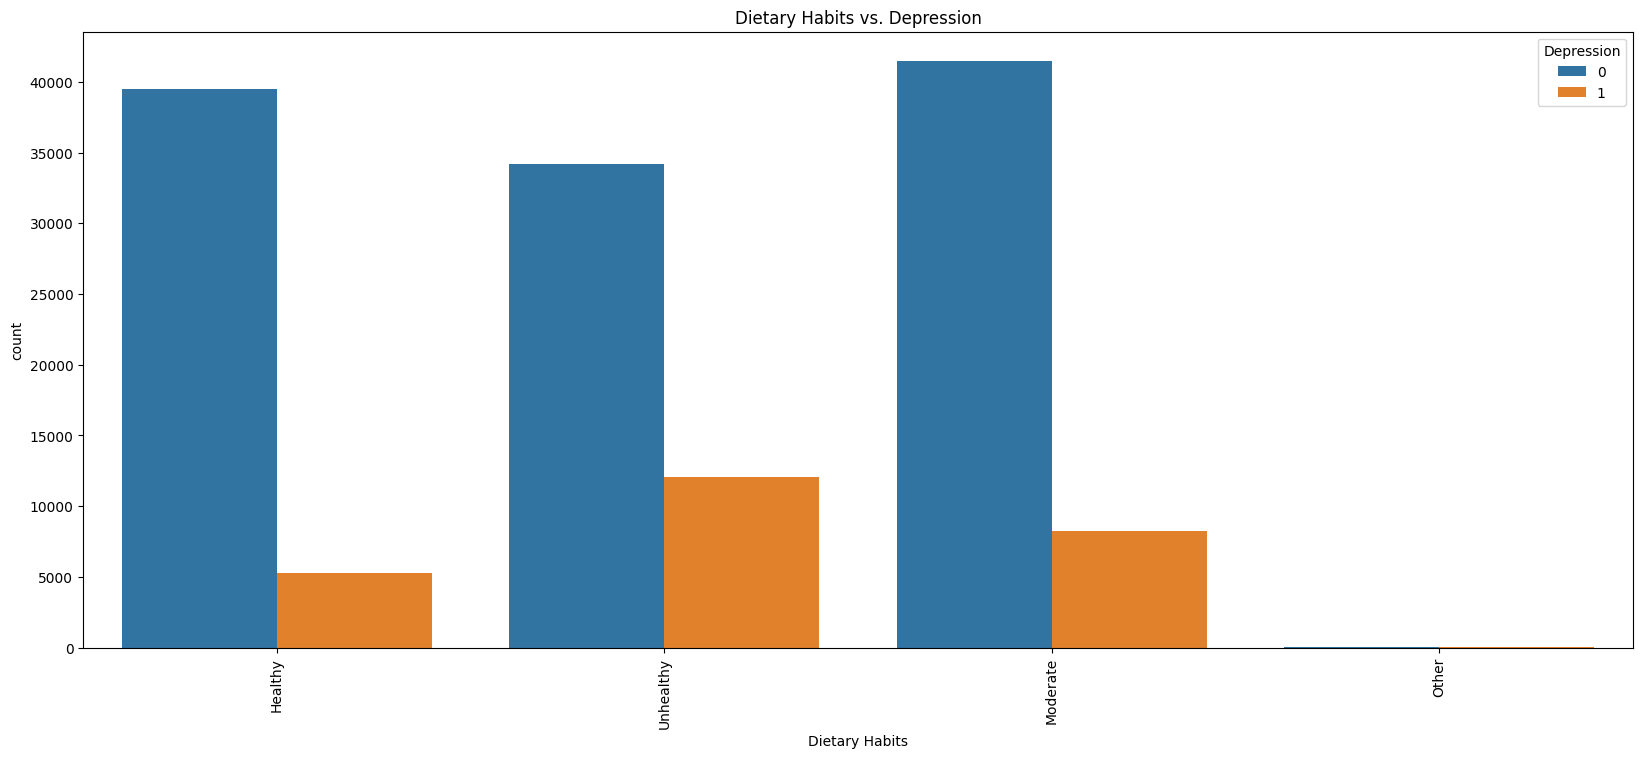

In [78]:
plot_categorical_vs_categorical(data, 'Dietary Habits', 'Depression')

#### Insights:
- Individuals with healthy dietary habits show a significantly larger proportion of individuals who are not depressed compared to those who are depressed
- Unhealthy dietary habits have a noticeably higher proportion of depressed individuals compared to the other categories
- The "Moderate" dietary habits group shows a balance similar to the "Healthy" group, with a larger number of non-depressed individuals, though there is still a noticeable population of depressed individuals
- Healthy and Moderate dietary habits seem to be more common among the population compared to Unhealthy habits
- The "Other" category has very few observations and may not significantly contribute to the overall analysis
- There is a clear trend suggesting that healthy dietary habits are associated with lower levels of depression
- Conversely, unhealthy dietary habits are associated with a higher prevalence of depression

### Degree vs. Depression

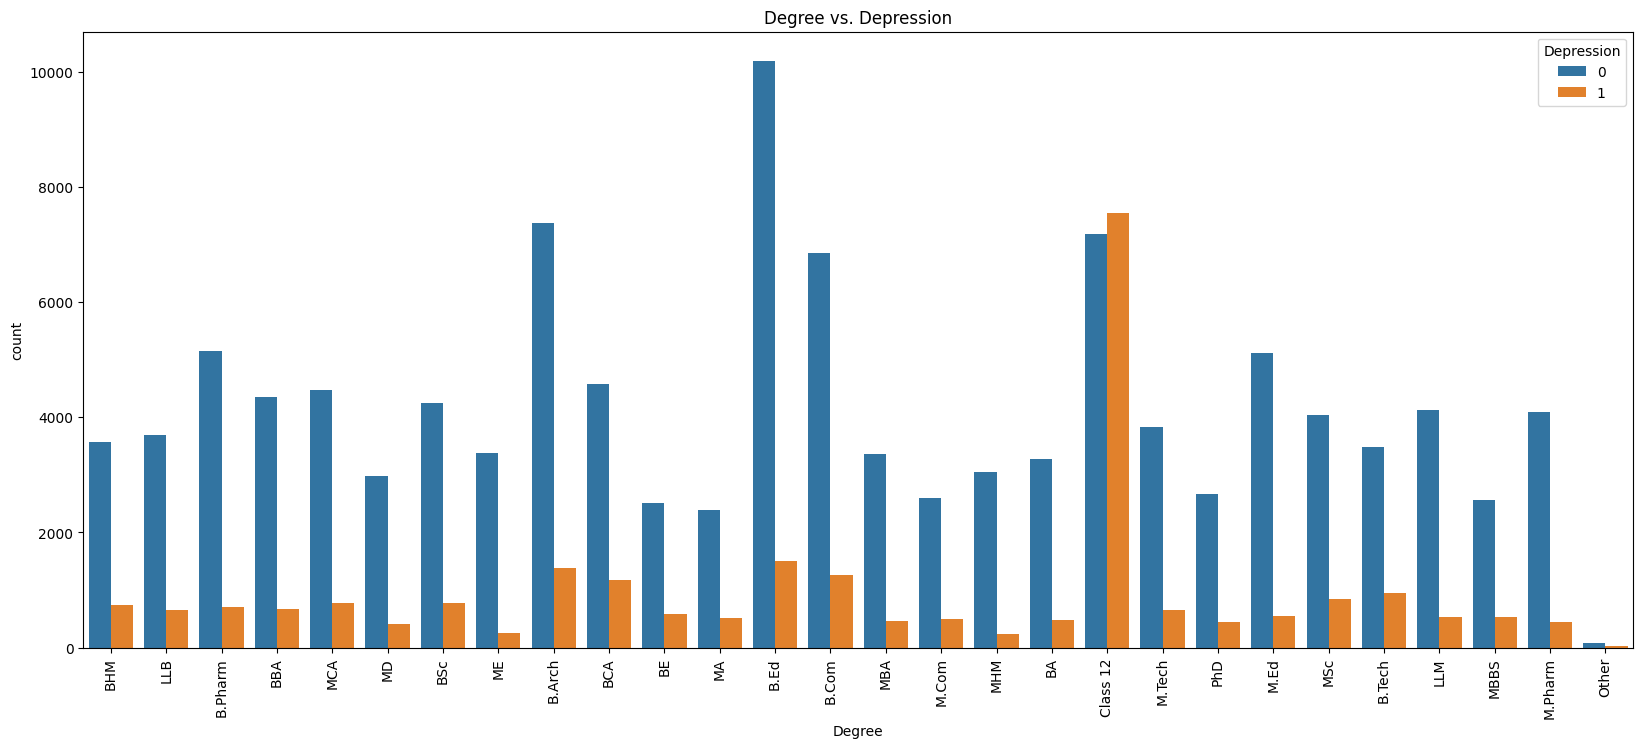

In [79]:
plot_categorical_vs_categorical(data, 'Degree', 'Depression', batched=False)

#### Insights:
- Individuals holding a "Class 12" qualification show a higher count of depressed individuals relative to many other degree categories. This suggests that individuals at this education level might face unique challenges or pressures, potentially tied to career or further studies
- Among advanced degrees (e.g., Ph.D., M.Tech, MBA), the proportion of not depressed individuals is significantly higher compared to depressed ones. This could indicate greater stability or satisfaction associated with higher educational achievements
- Professional degrees like B.Ed, B.Tech, and MBBS show more non-depressed individuals but still have a noticeable portion of individuals experiencing depression. These fields may come with their own stressors, such as demanding workloads or academic pressure
- Undergraduate degrees (B.A, B.Sc, BBA, etc.) tend to have a balanced distribution, with a significant majority of non-depressed individuals. However, the proportion of depressed individuals is non-negligible, possibly reflecting early career challenges or uncertainties

### Have you ever had suicidal thoughts ? vs. Depression

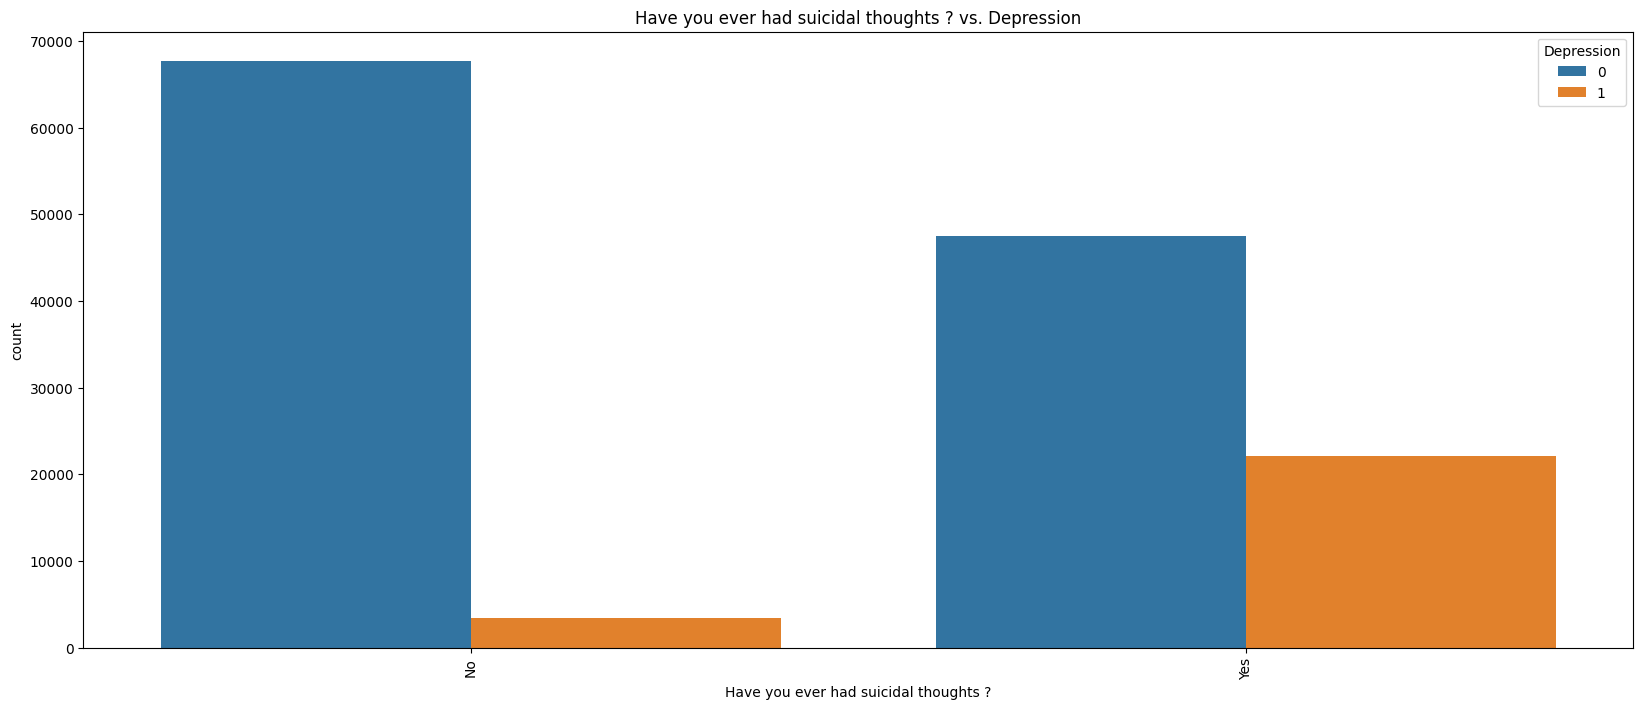

In [80]:
plot_categorical_vs_categorical(data, 'Have you ever had suicidal thoughts ?', 'Depression')

#### Insights:
- The graph highlights a strong relationship between having suicidal thoughts and being categorized as depressed. The majority of individuals who answered "Yes" to having suicidal thoughts are also labeled as depressed
- Among individuals who reported not having suicidal thoughts, the majority are not depressed, which aligns with expectations, as the absence of such thoughts is often associated with better mental health

### Work/Study Hours vs. Depression

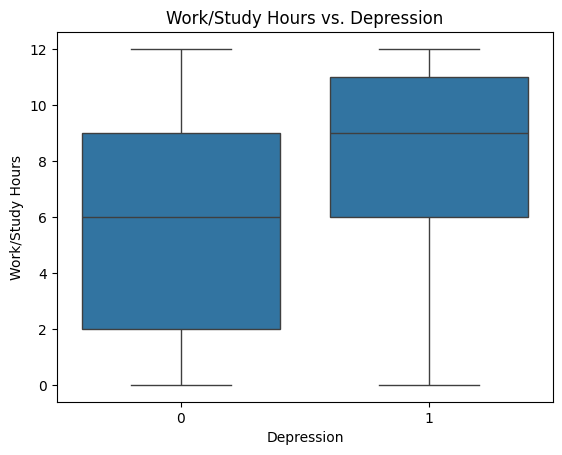

In [81]:
plot_numerical_vs_categorical(data, 'Work/Study Hours', 'Depression')

#### Insights:
- The boxplot shows that the median work/study hours for individuals classified as depressed is higher compared to those who are not depressed. This suggests that longer work/study hours might be correlated with depression
- The depressed group exhibits a wider range in work/study hours, indicating that while some individuals in this category work/study extensively (close to 12 hours), others have lower work/study hours
- This could reflect different coping mechanisms or circumstances among depressed individuals
- The non-depressed group has a comparatively lower median work/study hour count and a wider interquartile range (IQR). This might suggest that a more balanced workload correlates with better mental health

### Financial Stress vs. Depression

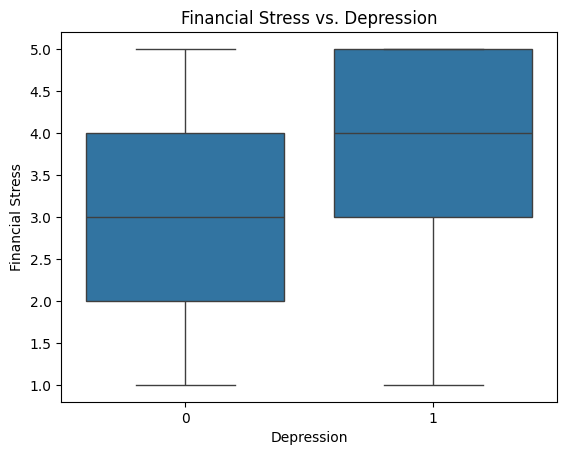

In [82]:
plot_numerical_vs_categorical(data, 'Financial Stress', 'Depression')

#### Insights:
- The boxplot shows that individuals categorized as depressed have a higher median financial stress level compared to those who are not depressed. This suggests a strong correlation between financial stress and depression
- The depressed group has a wider range of financial stress scores, with some individuals experiencing extremely high financial stress. This indicates that financial challenges are more pronounced in this group

### Family History of Mental Illness vs. Depression

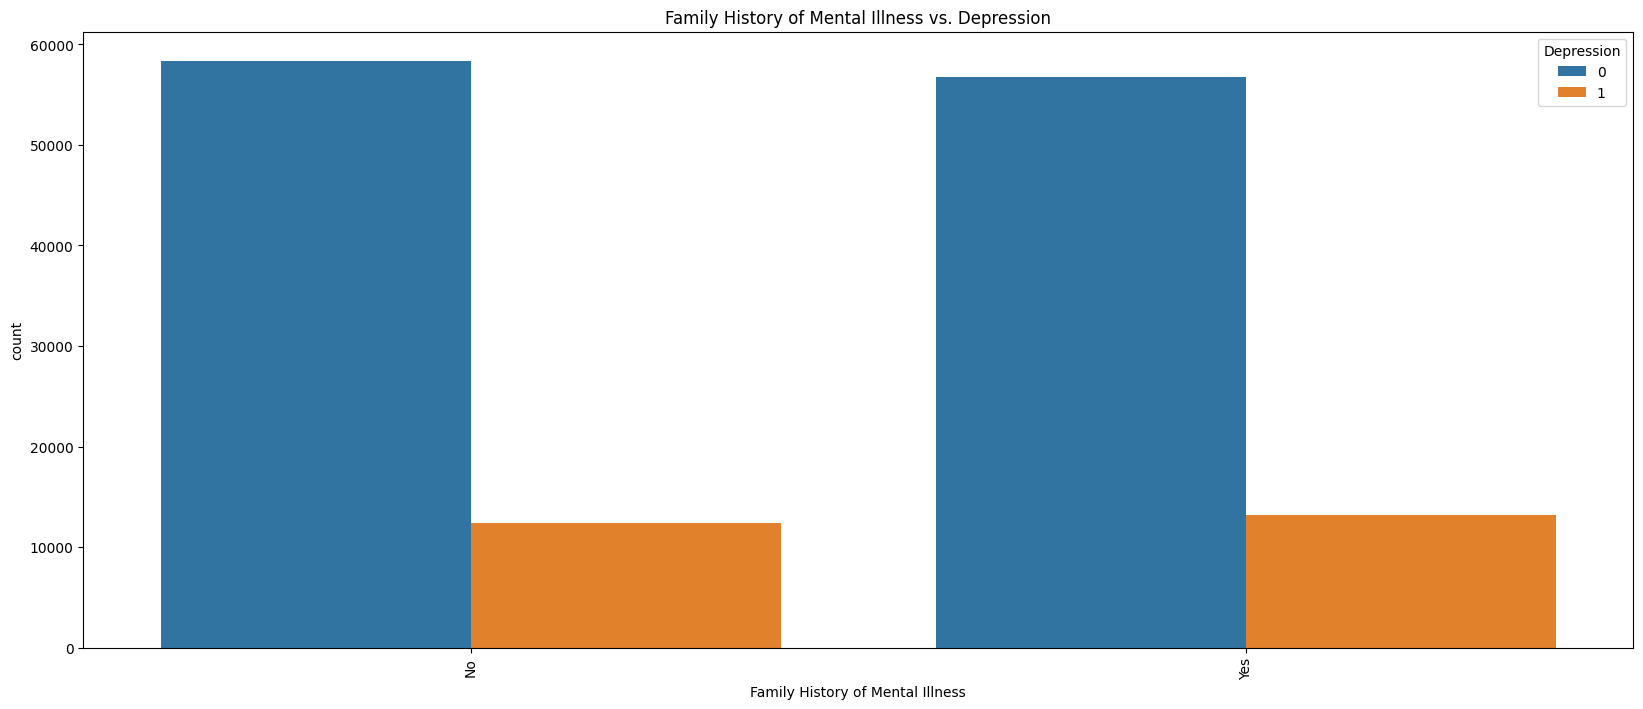

In [83]:
plot_categorical_vs_categorical(data, 'Family History of Mental Illness', 'Depression')

#### Insights:
- Individuals with a family history of mental illness have a higher count of depression cases compared to those without such a history. This highlights a potential genetic or environmental link between family mental health and individual mental health
- While the overall count of individuals without a family history of mental illness is higher, the proportion of depression cases within the "Yes" group (those with a family history) is significantly greater than in the "No" group

## Multivariate Analysis

### Students related attributes

<Axes: >

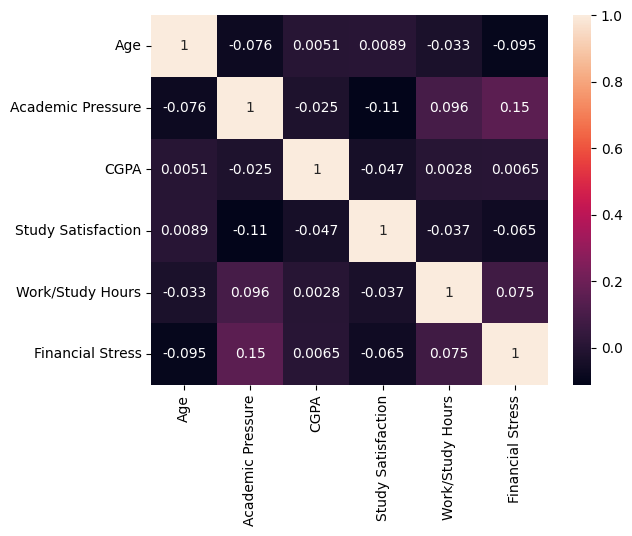

In [84]:
sns.heatmap(data.loc[data['Working Professional or Student'] == 'Student', ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']].corr(), annot=True)

#### Insights:
- **Academic Pressure vs Financial Stress:** Positive correlation (0.15), indicating that students experiencing higher academic pressure tend to have slightly higher financial stress
- **Work/Study Hours vs Academic Pressure:** Positive correlation (0.096), suggesting that more work/study hours are weakly associated with higher academic pressure
- **Age vs Financial Stress:** Negative correlation (-0.095), implying that younger students might experience slightly higher financial stress
- **Study Satisfaction:**
    - Negatively correlated with academic pressure (-0.11), suggesting that students under greater academic pressure are likely to have lower study satisfaction
    - Weak negative correlation with financial stress (-0.065), hinting that financial stress might slightly reduce study satisfaction
- **CGPA:** Weak correlations with all other variables, suggesting that academic performance (CGPA) might not strongly relate to academic pressure, study satisfaction, or other variables in this dataset
- **Work/Study Hours:** Negligible correlation with most variables, indicating that the number of work/study hours does not strongly influence or relate to other factors

### Working Professionals related attributes

<Axes: >

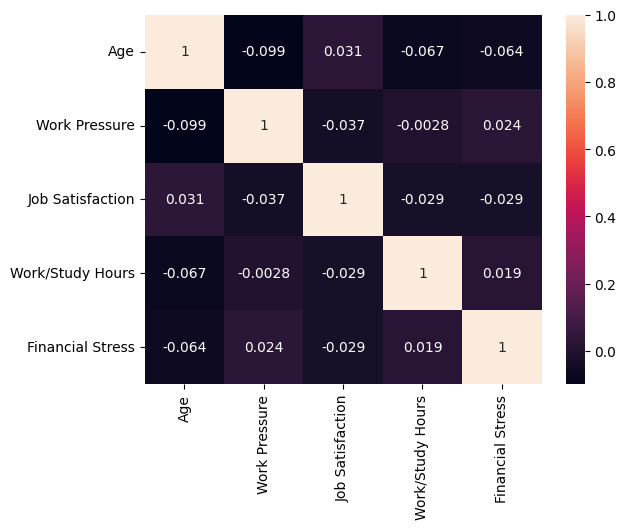

In [85]:
sns.heatmap(data.loc[data['Working Professional or Student'] == 'Working Professional', ['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']].corr(), annot=True)

#### Insights:
- All the correlations are quite low (close to 0), indicating weak linear relationships between these variables
- **Work Pressure vs Financial Stress:** Slightly positive correlation (0.024), which suggests a minimal association. This may indicate that as work pressure increases, financial stress might slightly increase, but the effect is negligible
- **Job Satisfaction vs Work Pressure:** Slight negative correlation (-0.037), implying that higher work pressure could be weakly associated with lower job satisfaction
- **Work/Study Hours vs Other Variables:** Very weak relationships, with correlations close to 0, indicating almost no linear relationship.
- **Age and Other Variables:** Weak negative correlation with work pressure (-0.099), work/study hours (-0.067), and financial stress (-0.064). This suggests that older individuals might experience slightly less work pressure, work/study hours, and financial stress
- The weak correlations suggest that these variables might not have strong direct linear relationships. However, non-linear relationships or interactions may exist, which are not captured by correlation.

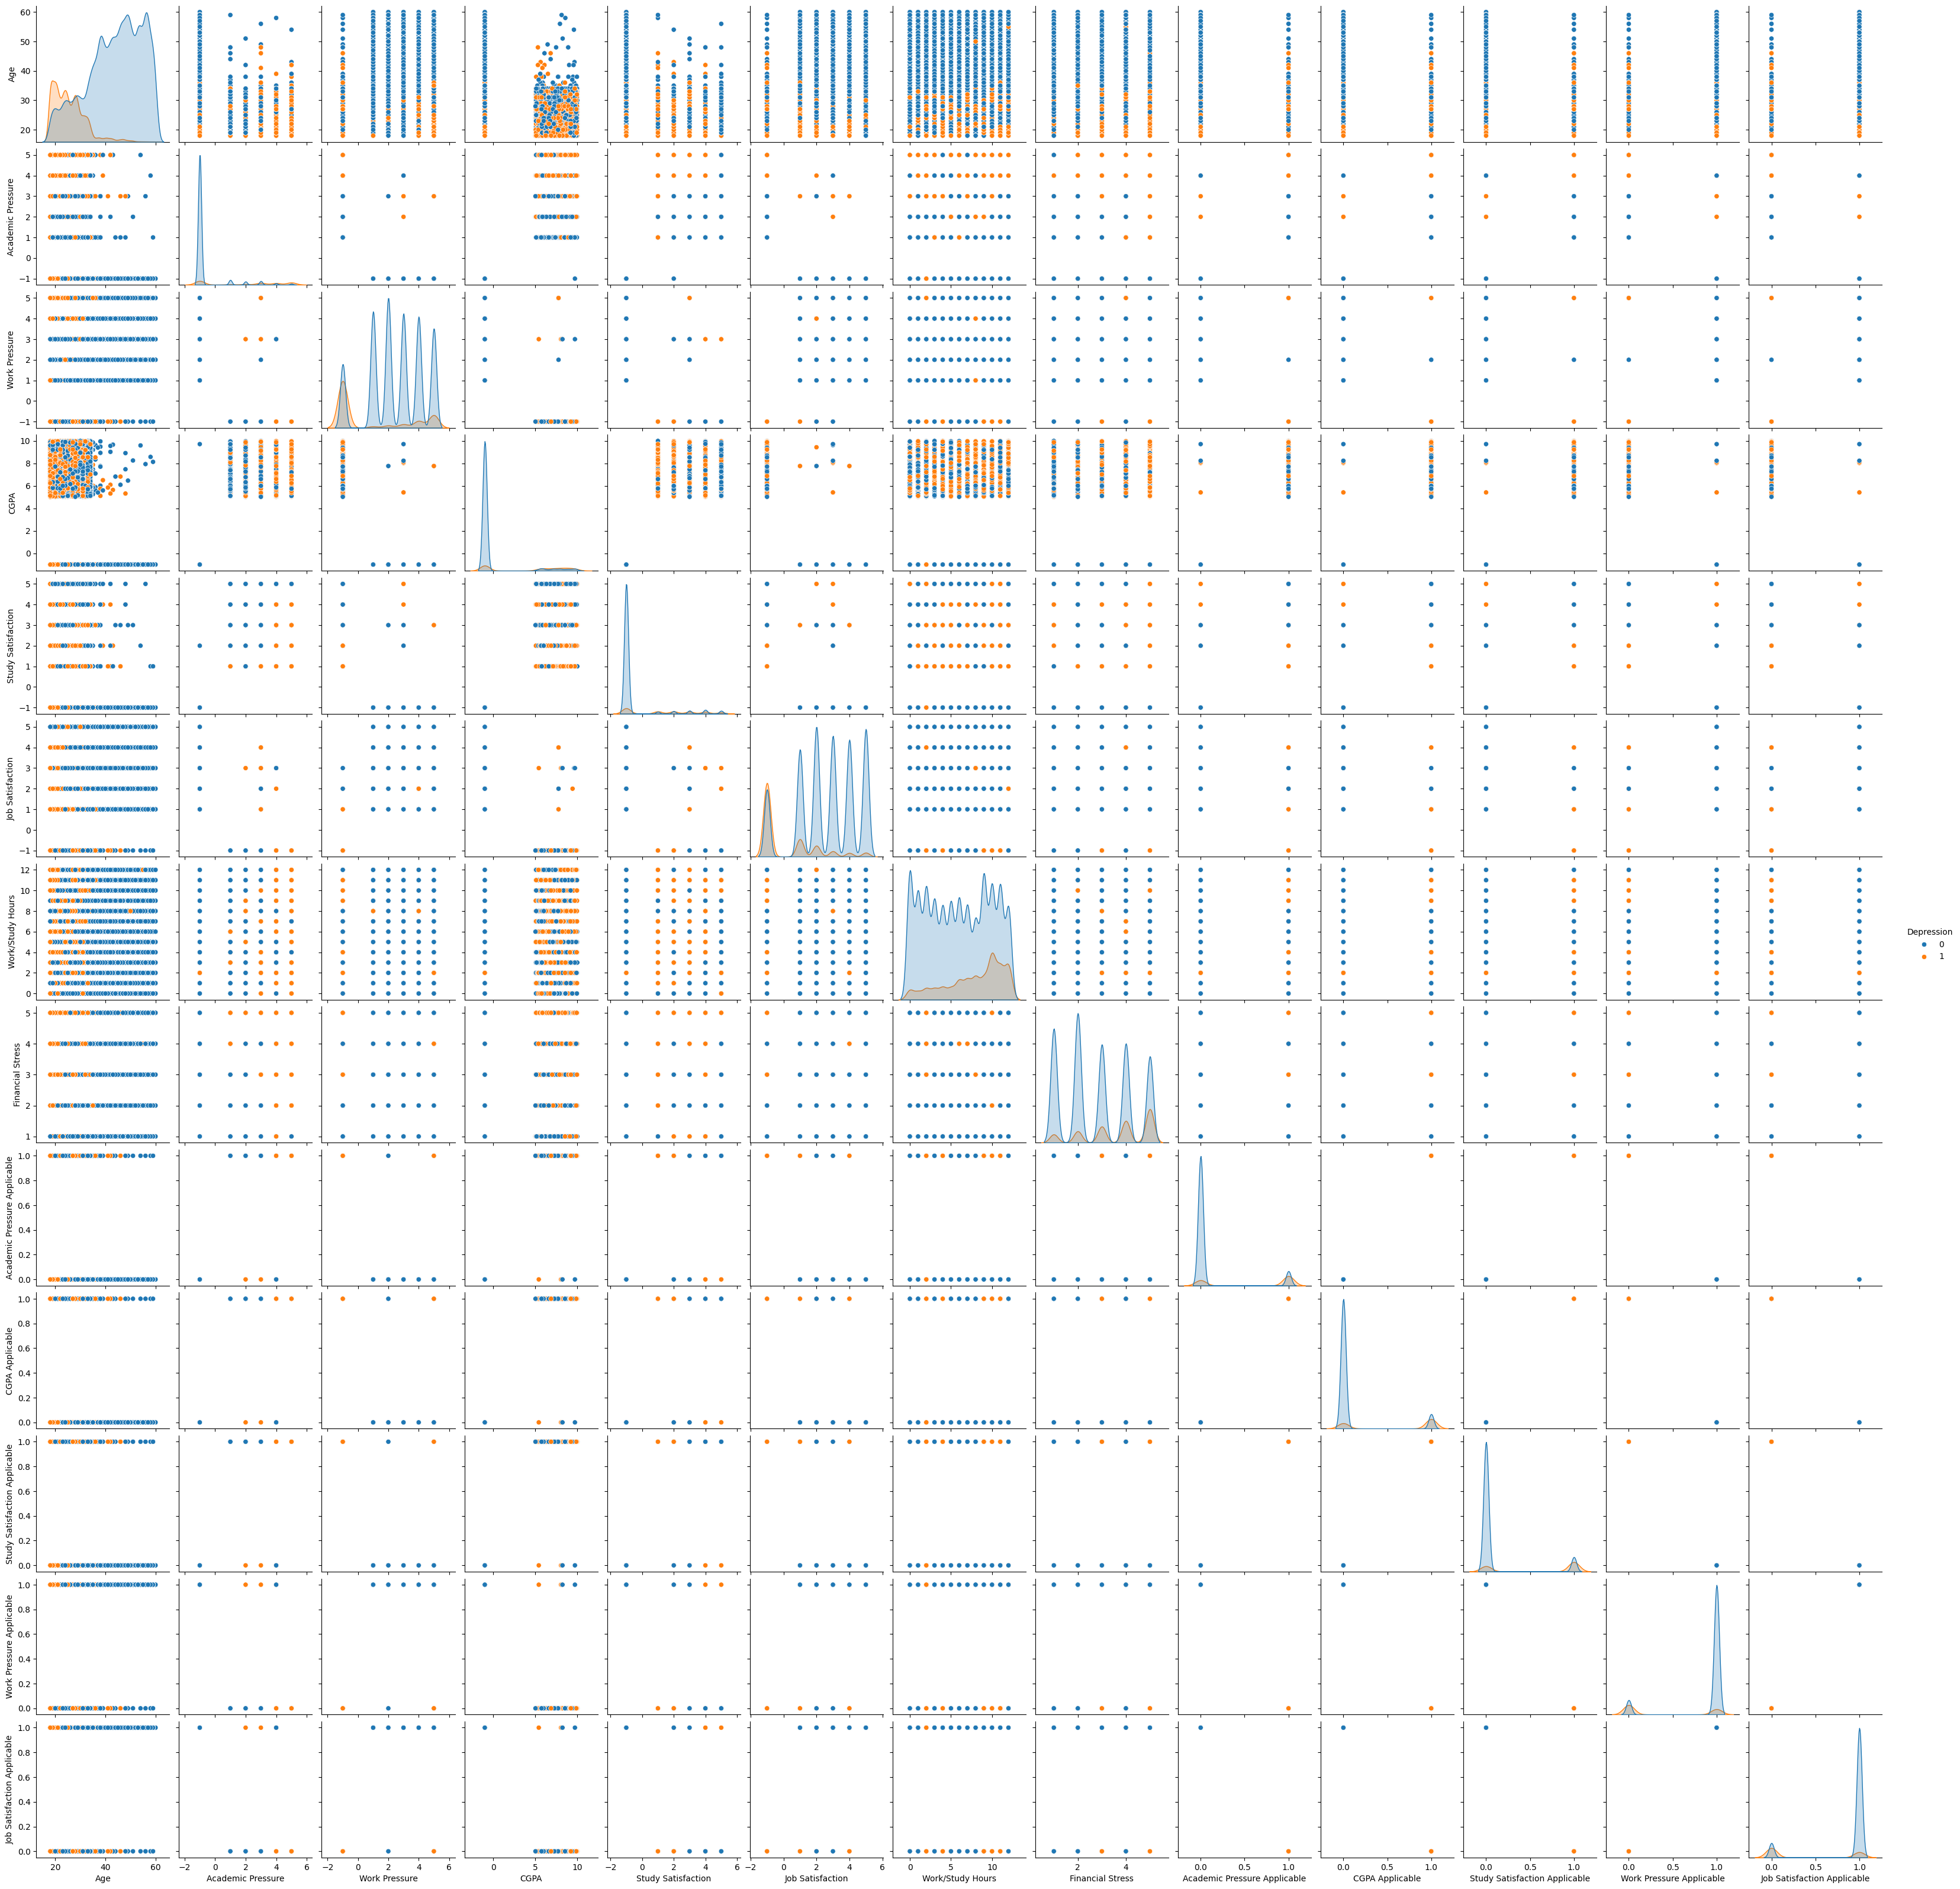

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
sns.pairplot(data, hue="Depression", diag_kind="kde")
plt.show()

## Saving cleaned data

In [91]:
save_data(data, "cleaned", "train")

Dataframe saved!
